## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.tools as tls
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go


# For encoding the categorical columns
from sklearn.preprocessing import OneHotEncoder

# for splitting the data into test and train
from sklearn.model_selection import train_test_split

# for min_max scaling
from sklearn.preprocessing import MinMaxScaler

# for normalization
from sklearn.preprocessing import StandardScaler

# For creating the pipelines
from sklearn.pipeline import Pipeline

# For KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# For SVM Classifier
from sklearn.svm import SVC

# For Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# For the confusion matrix
from sklearn.metrics import confusion_matrix

# For calculating the accuracy score
from sklearn.metrics import accuracy_score

## Load Dataset

In [2]:
# Load Dataset
df_2018 = pd.read_csv('/Users/umasid/Uni/CS5811 - Distributed Data Analysis/Kickstarter project Data/ks-projects-201801.csv')

In [3]:
df_2018.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2  2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

In [4]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


### Missing Values

In [5]:
# Calculate the missing values percentage in each column
missing_total = df_2018.isnull().sum().sort_values(ascending=False)
percent = ((missing_total*100)/(df_2018.isnull().count())).sort_values(ascending=False)
percent

usd pledged         1.002744
name                0.001056
ID                  0.000000
backers             0.000000
category            0.000000
country             0.000000
currency            0.000000
deadline            0.000000
goal                0.000000
launched            0.000000
main_category       0.000000
pledged             0.000000
state               0.000000
usd_goal_real       0.000000
usd_pledged_real    0.000000
dtype: float64

In practise we will drop the column wherever there is atleast 15% of the data is missing. But here we don't have any column with more than 15% missing data. So, we don't need to drop any column on the grounds of insufficient data.

### Dropping Unnecessary Columns

Lets first drop the columns which are redundant. The columns <b>ID</b> and <b>name</b> are useless in modelling. So, we will drop them. 
The columns <b>goal</b> and <b>pledged</b> are in the project currency, which were already converted in to USD currency and named as <b>usd pledged</b>, <b>usd_pledged_real</b> and <b>usd_goal_real</b>.  So, we will drop <b>goal</b> and <b>pledged</b>.

Both <b>usd pledged</b> and <b>usd_pledged_real</b> contains the pledged amount in USD, but with different sources of currency exchange applications. As fixer.io is an trustworthy source for exchange rates we will consider the <b>usd_pledged_real</b> and drop the <b>usd pledged</b>.


In [6]:
df_2018.drop(['ID', 'name', 'goal', 'pledged', 'usd pledged'], axis=1, inplace=True)
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   category          378661 non-null  object 
 1   main_category     378661 non-null  object 
 2   currency          378661 non-null  object 
 3   deadline          378661 non-null  object 
 4   launched          378661 non-null  object 
 5   state             378661 non-null  object 
 6   backers           378661 non-null  int64  
 7   country           378661 non-null  object 
 8   usd_pledged_real  378661 non-null  float64
 9   usd_goal_real     378661 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 28.9+ MB


Now we don't have any missing values in our dataframe

### Changing the datatypes

From the above output the datatypes of the columns are inappropriate. So, let's try to change them in the following way.

In [7]:
# converting the deadline to datetime64 datatype, which is a native datetime type of Pandas.
df_2018['deadline'] = pd.to_datetime(df_2018['deadline']) 

# Converting the launched to datetime64 datatype, as the dt.date works only on the datetime64 datatype.
df_2018['launched'] = pd.to_datetime(df_2018['launched'], format='%Y-%m-%d')

# Removing the timestamp and keeping only the date. But the datatype will go back to object.
df_2018['launched'] = df_2018['launched'].dt.date

# Convert the 'launched' column datatype to datetime64
df_2018['launched'] = pd.to_datetime(df_2018['launched'], format='%Y-%m-%d')
df_2018.head()

category main_category currency   deadline   launched     state  \
0          Poetry    Publishing      GBP 2015-10-09 2015-08-11    failed   
1  Narrative Film  Film & Video      USD 2017-11-01 2017-09-02    failed   
2  Narrative Film  Film & Video      USD 2013-02-26 2013-01-12    failed   
3           Music         Music      USD 2012-04-16 2012-03-17    failed   
4    Film & Video  Film & Video      USD 2015-08-29 2015-07-04  canceled   

   backers country  usd_pledged_real  usd_goal_real  
0        0      GB               0.0        1533.95  
1       15      US            2421.0       30000.00  
2        3      US             220.0       45000.00  
3        1      US               1.0        5000.00  
4       14      US            1283.0       19500.00

In [8]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   category          378661 non-null  object        
 1   main_category     378661 non-null  object        
 2   currency          378661 non-null  object        
 3   deadline          378661 non-null  datetime64[ns]
 4   launched          378661 non-null  datetime64[ns]
 5   state             378661 non-null  object        
 6   backers           378661 non-null  int64         
 7   country           378661 non-null  object        
 8   usd_pledged_real  378661 non-null  float64       
 9   usd_goal_real     378661 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 28.9+ MB


Now the columns are having right datatypes.

## Creating new columns

As we have the project launched date and the deadline date, we can create a new column to capture the duration of a project

In [9]:
# creating duration_days column
df_2018['duration_days'] = (df_2018['deadline']-df_2018['launched'])/np.timedelta64(1,'D')
# Converting the duration_days column from float to int
df_2018['duration_days'] = df_2018['duration_days'].astype(int)
df_2018

category main_category currency   deadline   launched  \
0                Poetry    Publishing      GBP 2015-10-09 2015-08-11   
1        Narrative Film  Film & Video      USD 2017-11-01 2017-09-02   
2        Narrative Film  Film & Video      USD 2013-02-26 2013-01-12   
3                 Music         Music      USD 2012-04-16 2012-03-17   
4          Film & Video  Film & Video      USD 2015-08-29 2015-07-04   
...                 ...           ...      ...        ...        ...   
378656      Documentary  Film & Video      USD 2014-10-17 2014-09-17   
378657   Narrative Film  Film & Video      USD 2011-07-19 2011-06-22   
378658   Narrative Film  Film & Video      USD 2010-08-16 2010-07-01   
378659       Technology    Technology      USD 2016-02-13 2016-01-13   
378660  Performance Art           Art      USD 2011-08-16 2011-07-19   

           state  backers country  usd_pledged_real  usd_goal_real  \
0         failed        0      GB               0.0        1533.95   
1         failed       15      US            2421.0       30000.00   
2         failed        3      US             220.0       45000.00   
3         failed        1      US               1.0        5000.00   
4       canceled       14      US            1283.0       19500.00   
...          ...      ...     ...               ...            ...   
378656  canceled        1      US              25.0       50000.00   
378657    failed        5      US             155.0        1500.00   
378658    failed        1      US              20.0       15000.00   
378659    failed        6      US             200.0       15000.00   
378660    failed       17      US             524.0        2000.00   

        duration_days  
0                  59  
1                  60  
2                  45  
3                  30  
4                  56  
...               ...  
378656             30  
378657             27  
378658             46  
378659             31  
378660             28  

[378661 rows x 11 columns]

In [10]:
df_2018.head()

category main_category currency   deadline   launched     state  \
0          Poetry    Publishing      GBP 2015-10-09 2015-08-11    failed   
1  Narrative Film  Film & Video      USD 2017-11-01 2017-09-02    failed   
2  Narrative Film  Film & Video      USD 2013-02-26 2013-01-12    failed   
3           Music         Music      USD 2012-04-16 2012-03-17    failed   
4    Film & Video  Film & Video      USD 2015-08-29 2015-07-04  canceled   

   backers country  usd_pledged_real  usd_goal_real  duration_days  
0        0      GB               0.0        1533.95             59  
1       15      US            2421.0       30000.00             60  
2        3      US             220.0       45000.00             45  
3        1      US               1.0        5000.00             30  
4       14      US            1283.0       19500.00             56

In [11]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   category          378661 non-null  object        
 1   main_category     378661 non-null  object        
 2   currency          378661 non-null  object        
 3   deadline          378661 non-null  datetime64[ns]
 4   launched          378661 non-null  datetime64[ns]
 5   state             378661 non-null  object        
 6   backers           378661 non-null  int64         
 7   country           378661 non-null  object        
 8   usd_pledged_real  378661 non-null  float64       
 9   usd_goal_real     378661 non-null  float64       
 10  duration_days     378661 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 31.8+ MB


### Looking at the Balance of the dataset

['failed' 'canceled' 'successful' 'live' 'undefined' 'suspended']
state
canceled       38779
failed        197719
live            2799
successful    133956
suspended       1846
undefined       3562
dtype: int64


<AxesSubplot:xlabel='state', ylabel='count'>

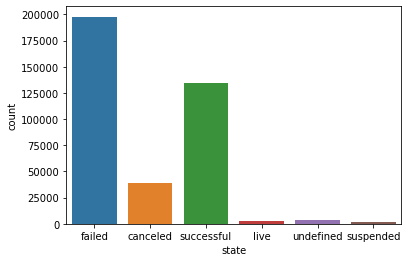

In [12]:
# As we are dealing with the classification problem, let's look at the balance of the dataset.
print(df_2018['state'].unique()) #Printing all the unique values present in the field state
print(df_2018.groupby('state').size()) # printing the counts of each category of states.
sns.countplot(x='state', data=df_2018 ) # visualising the counts of each category.

The data is highly imbalanced.

## Dropping the rows 

### Finding Duplicate rows

In [13]:
# Selecting duplicate rows
duplicate = df_2018[df_2018.duplicated(keep='first')]
print(duplicate)

          category main_category currency   deadline   launched       state  \
49993   Live Games         Games      USD 2014-05-30 2014-05-01  successful   
51769      Fiction    Publishing      USD 2012-10-25 2012-09-25      failed   
56686      Fashion       Fashion      USD 2015-03-20 2015-02-18      failed   
57242         Food          Food      USD 2014-09-12 2014-08-13      failed   
63945         Apps    Technology      GBP 2014-08-10 2014-07-11      failed   
...            ...           ...      ...        ...        ...         ...   
373137       Bacon          Food      USD 2014-08-10 2014-07-11      failed   
373665     Hip-Hop         Music      USD 2013-09-01 2013-08-02      failed   
375985  Nonfiction    Publishing      USD 2015-07-01 2015-06-01      failed   
377741     Fiction    Publishing      USD 2013-10-05 2013-09-05      failed   
377965        Food          Food      USD 2014-08-07 2014-07-08      failed   

        backers country  usd_pledged_real  usd_goal

There are about 225 rows which are duplicated. So, lets drop them first.

### Dropping the duplicate rows

In [14]:
df_2018.drop_duplicates(keep='first', inplace=True)

### Verifying if there are any more duplicates

In [15]:
# Verifying that there are no duplicates left.
# Selecting duplicate rows
duplicate = df_2018[df_2018.duplicated()]
duplicate

Empty DataFrame
Columns: [category, main_category, currency, deadline, launched, state, backers, country, usd_pledged_real, usd_goal_real, duration_days]
Index: []

## Dropping the Unwanted project states

Kickstarter platform operates in a way of all or nothing strategy, which means a  project gets the funding only if it reaches the pledged amount reaches the target within the deadline. So, the project will be marked by the platform automatically as "successful" if it reaches the target amount within the deadline, otherwise it will be marked as "failure" after the deadline.

Our dataset consists of 4 more states namely <b>"live", "suspended","cancelled" & "undefined"</b>

### Looking at the suspended projects

Below is the information we have directly taken from the kickstarter website.

**A project may be suspended if platform's Trust & Safety team uncovers evidence that it is in violation of Kickstarter's rules.**

So, we cannot model the suspended projects as they are suspended for different reasons which are outside of this dataset and practical reasons which we no clue about them. So, we will drop the records with **suspended** state.

### Dropping the Suspended project records.

In [16]:
# Dropping the Suspended projects
print('Before dropping the Suspended projects: ', df_2018.shape)
print('No of suspended records:', df_2018[df_2018['state']=='suspended'].shape[0])
df_2018.drop(df_2018[df_2018['state']=='suspended'].index, inplace=True) # dropping the suspended projects.
print('After dropping the Suspended projects: ', df_2018.shape)
df_2018.info()

Before dropping the Suspended projects:  (378436, 11)
No of suspended records: 1845
After dropping the Suspended projects:  (376591, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 376591 entries, 0 to 378660
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   category          376591 non-null  object        
 1   main_category     376591 non-null  object        
 2   currency          376591 non-null  object        
 3   deadline          376591 non-null  datetime64[ns]
 4   launched          376591 non-null  datetime64[ns]
 5   state             376591 non-null  object        
 6   backers           376591 non-null  int64         
 7   country           376591 non-null  object        
 8   usd_pledged_real  376591 non-null  float64       
 9   usd_goal_real     376591 non-null  float64       
 10  duration_days     376591 non-null  int64         
dtypes: datetime64[ns](2), float64(2)

### Looking into the Cancelled projects

In the kickstarter's website it is mentioned that a project goes in to the cancelled state if the project owner decides to cancel it because of some reason like the project creator feels the project is practically not viable, the project information is wrongly entered by mistake, etc.

So, all these projects are cancelled due to the external reasons which are out of the scope of this dataset. So, is illogical to model the cancelled projects. Hence, we will drop them.

### Dropping the Cancelled projects

In [17]:
# Dropping the cancelled projects
print('Before dropping the Cancelled projects: ', df_2018.shape)
print('No of Cancelled records:', df_2018[df_2018['state']=='canceled'].shape[0])
df_2018.drop(df_2018[df_2018['state']=='canceled'].index, inplace=True) # dropping the suspended projects.
print('After dropping the Cancelled projects: ', df_2018.shape)
df_2018.info()

Before dropping the Cancelled projects:  (376591, 11)
No of Cancelled records: 38757
After dropping the Cancelled projects:  (337834, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 337834 entries, 0 to 378660
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   category          337834 non-null  object        
 1   main_category     337834 non-null  object        
 2   currency          337834 non-null  object        
 3   deadline          337834 non-null  datetime64[ns]
 4   launched          337834 non-null  datetime64[ns]
 5   state             337834 non-null  object        
 6   backers           337834 non-null  int64         
 7   country           337834 non-null  object        
 8   usd_pledged_real  337834 non-null  float64       
 9   usd_goal_real     337834 non-null  float64       
 10  duration_days     337834 non-null  int64         
dtypes: datetime64[ns](2), float64(2

### Dealing with 'undefined' state projects 

Let's first look at the 'undefined' state records and findout what's wrong with them.

In [18]:
df_undefined_state = df_2018[df_2018['state']=='undefined']
df_undefined_state

category main_category currency   deadline   launched      state  \
169     Film & Video  Film & Video      USD 2014-09-20 2014-08-06  undefined   
328            Music         Music      AUD 2015-08-25 2015-08-04  undefined   
632            Music         Music      USD 2015-04-09 2015-03-10  undefined   
647            Music         Music      USD 2015-11-26 2015-11-02  undefined   
749            Music         Music      USD 2016-03-21 2016-02-23  undefined   
...              ...           ...      ...        ...        ...        ...   
378233  Film & Video  Film & Video      USD 2015-02-03 2014-12-05  undefined   
378303  Film & Video  Film & Video      CAD 2014-05-23 2014-04-08  undefined   
378434         Music         Music      USD 2016-02-05 2016-01-06  undefined   
378585         Music         Music      GBP 2015-10-19 2015-09-21  undefined   
378588    Publishing    Publishing      EUR 2015-11-20 2015-10-21  undefined   

        backers country  usd_pledged_real  usd_goal_real  duration_days  
169           0    N,0"            555.00        6500.00             45  
328           0    N,0"           3402.08        3211.53             21  
632           0    N,0"           3576.00        3500.00             30  
647           0    N,0"           7007.80        6000.00             24  
749           0    N,0"           3660.38        3000.00             27  
...         ...     ...               ...            ...            ...  
378233        0    N,0"             10.00        7500.00             60  
378303        0    N,0"           2845.61        2752.04             45  
378434        0    N,0"            235.00        5000.00             30  
378585        0    N,0"           3273.36        3080.81             28  
378588        0    N,0"              0.00        1710.08             30  

[3560 rows x 11 columns]

With the first look at it, it seems that the backers for the undefined projects are 0. Lets find out if its true or not.

In [19]:
for col in df_undefined_state:
    print(col, ' : ', df_undefined_state[col].unique())

category  :  ['Film & Video' 'Music' 'Publishing' 'Games' 'Nonfiction' 'Theater'
 'Hip-Hop' 'Accessories' 'Software' '3D Printing' 'Fiction' 'Dance'
 'Product Design' 'Horror' 'Fine Art' 'Narrative Film' 'Documentary']
main_category  :  ['Film & Video' 'Music' 'Publishing' 'Games' 'Theater' 'Fashion'
 'Technology' 'Dance' 'Design' 'Photography']
currency  :  ['USD' 'AUD' 'CAD' 'GBP' 'EUR' 'SEK' 'DKK' 'NZD' 'NOK' 'CHF']
deadline  :  ['2014-09-20T00:00:00.000000000' '2015-08-25T00:00:00.000000000'
 '2015-04-09T00:00:00.000000000' '2015-11-26T00:00:00.000000000'
 '2016-03-21T00:00:00.000000000' '2014-10-10T00:00:00.000000000'
 '2015-06-11T00:00:00.000000000' '2015-11-07T00:00:00.000000000'
 '2015-03-28T00:00:00.000000000' '2015-12-11T00:00:00.000000000'
 '2015-12-18T00:00:00.000000000' '2015-04-10T00:00:00.000000000'
 '2015-03-25T00:00:00.000000000' '2014-10-31T00:00:00.000000000'
 '2015-11-17T00:00:00.000000000' '2015-10-30T00:00:00.000000000'
 '2014-10-11T00:00:00.000000000' '2016-03-12

In [20]:
print(df_undefined_state.backers.unique()) # finding if there are any backers for the undefined state projects.
print(df_undefined_state['usd_pledged_real'].unique()) # finding if there is 'usd pledged' for the undefined projects.

[0]
[ 555.   3402.08 3576.   ... 6065.26 2845.61 3273.36]


It is clear that the 'undefined' state projects are having 0 backers. So, let's see if we can treat these 'undefined' projects as failed.

In [21]:
df_2018.query('state!="undefined" and backers==0').state.unique() # finding if there are any other states for the projects where backers are 0

array(['failed', 'live', 'successful'], dtype=object)

From the above output it is clear that there are some projects where the backers are 0, but the state is still 'successful'. So, we have to dig into it and correct this. We will make note of it and work on this in the later steps.

In [22]:
df_2018.query('state=="failed"').backers.unique() # finding if the failed projects are all having 0 backers.

array([   0,   15,    3,    1,   40,   11,   16,   20,   12,   30,   54,
          2,   25,    4,    5,    8,   13,    6,   76,   38,    9,   34,
         18,   10,   14,   67,  120,   44,   89,   90,  260,   55,   32,
         37,   29,   42,   26,    7,   21,   23,   62,   50,   36,   35,
         71,   19,   69,   27,  191,   41,  153,   17,   79,  150,   43,
        188,  369,   74,  257,   49,   59,  135,   48,   24,   64,   39,
         81,  193,   53,  161,   45,  502,  189,   78,  118,  183,  139,
        108,  209,   91,   33,  269,   57,   31,   28,   66,   85,   22,
        127,   63,   46,   93,   83,  194,   60,   70,  152, 1157,  233,
         77,  195,  151,  171,  228, 1794,  147,   88,  113,  101,  123,
        170,   61,  104,  110,  119,  177,  133,  227,   73,  144,  173,
        186,   68,   52,   47,   95,  145,  157,  138,   56,   92,  691,
         97,  945,  202,   87,  218,  224,   72,   58,   65,  769,  116,
        117,  100,  324,  166,   94,  122,  244,   

As there are many records with some backers for the failed projects, we can't treate the projects with state as 'undefined' and backers as 0 as 'failed'. 

As we don't have any clue about what the state 'undefined' means and also we don't have any backers and country info, it doesn't make any sense to correct the state with other related variables. Moreover these records are insignificant in number when compared to the whole dataset. So,the best thing is to drop the projects with undefined state.

In [23]:
df_2018.drop(df_2018[df_2018['state']=='undefined'].index, inplace=True) #Dropping the rows with 'undefined' state.
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334274 entries, 0 to 378660
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   category          334274 non-null  object        
 1   main_category     334274 non-null  object        
 2   currency          334274 non-null  object        
 3   deadline          334274 non-null  datetime64[ns]
 4   launched          334274 non-null  datetime64[ns]
 5   state             334274 non-null  object        
 6   backers           334274 non-null  int64         
 7   country           334274 non-null  object        
 8   usd_pledged_real  334274 non-null  float64       
 9   usd_goal_real     334274 non-null  float64       
 10  duration_days     334274 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 30.6+ MB


We need to drop the rows with the status as 'live', as the projects which are still live can not be used to train the model.

In [24]:
df_2018.drop(df_2018[df_2018['state']=='live'].index, inplace=True) # dropping the live projects.
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331476 entries, 0 to 378660
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   category          331476 non-null  object        
 1   main_category     331476 non-null  object        
 2   currency          331476 non-null  object        
 3   deadline          331476 non-null  datetime64[ns]
 4   launched          331476 non-null  datetime64[ns]
 5   state             331476 non-null  object        
 6   backers           331476 non-null  int64         
 7   country           331476 non-null  object        
 8   usd_pledged_real  331476 non-null  float64       
 9   usd_goal_real     331476 non-null  float64       
 10  duration_days     331476 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 30.3+ MB


### Looking for Jargon data in the categorical columns.

In [25]:
# Printing the unique data in all the columns and eyeballing them.
for col in df_2018:
    print(col, ' : ', df_2018[col].unique())

category  :  ['Poetry' 'Narrative Film' 'Music' 'Restaurants' 'Food' 'Drinks'
 'Nonfiction' 'Indie Rock' 'Crafts' 'Games' 'Tabletop Games' 'Design'
 'Comic Books' 'Art Books' 'Fashion' 'Childrenswear' 'Theater' 'Comics'
 'DIY' 'Webseries' 'Animation' 'Food Trucks' 'Product Design' 'Public Art'
 'Documentary' 'Illustration' 'Photography' 'Pop' 'People' 'Art' 'Family'
 'Fiction' 'Film & Video' 'Accessories' 'Rock' 'Hardware' 'Software'
 'Weaving' 'Web' 'Jazz' 'Ready-to-wear' 'Festivals' 'Video Games'
 'Anthologies' 'Publishing' 'Shorts' 'Gadgets' 'Electronic Music'
 'Radio & Podcasts' 'Cookbooks' 'Apparel' 'Metal' 'Comedy' 'Hip-Hop'
 'Periodicals' 'Dance' 'Technology' 'Painting' 'World Music' 'Photobooks'
 'Drama' 'Architecture' 'Young Adult' 'Latin' 'Mobile Games' 'Flight'
 'Fine Art' 'Action' 'Playing Cards' 'Makerspaces' 'Punk'
 "Children's Books" 'Apps' 'Audio' 'Performance Art' 'Ceramics' 'Vegan'
 'Graphic Novels' 'Fabrication Tools' 'Performances' 'Sculpture' 'Sound'
 'Stationery' 

With just eyeball rolling we can see that all the categorical column data is fine except the country column. There are some records with <b>N,0"</b> as the country name. So we need to correct this.

Let's first pull out the records with the country name as <b>N,0"</b> and figure out what can be done.

In [26]:
# Printing all the records with country as 'N,0"'
df_2018[df_2018['country']=='N,0"']

category main_category currency   deadline   launched       state  \
2457           Music         Music      USD 2016-05-26 2016-04-26  successful   
4892           Music         Music      USD 2016-05-11 2016-04-11  successful   
5353           Music         Music      USD 2016-05-21 2016-04-21  successful   
5597           Music         Music      USD 2016-05-08 2016-04-04  successful   
8260           Music         Music      USD 2016-05-01 2016-03-25  successful   
...              ...           ...      ...        ...        ...         ...   
368889         Music         Music      USD 2016-05-09 2016-04-09      failed   
371387         Print    Journalism      EUR 2016-04-28 2016-03-29      failed   
372375         Music         Music      USD 2016-04-28 2016-04-05  successful   
375359  Film & Video  Film & Video      USD 2016-05-06 2016-03-07      failed   
378188  Film & Video  Film & Video      USD 2016-05-14 2016-04-14  successful   

        backers country  usd_pledged_real  usd_goal_real  duration_days  
2457          0    N,0"           5170.00        5000.00             30  
4892          0    N,0"           5296.00        5000.00             30  
5353          0    N,0"           5077.00        3800.00             30  
5597          0    N,0"           3502.13        3500.00             34  
8260          0    N,0"           3787.00        3500.00             37  
...         ...     ...               ...            ...            ...  
368889        0    N,0"           1408.00        7500.00             30  
371387        0    N,0"           2204.21       17104.54             30  
372375        0    N,0"           3686.00        3500.00             23  
375359        0    N,0"              2.00        9000.00             60  
378188        0    N,0"           2300.00        2000.00             30  

[210 rows x 11 columns]

Now let's see if all the above records are having currency code with them. If yes, we can use the currency code and try to figure out the correct country code from the remaining data.

In [27]:
# Looking at all the unique values in the currency column for the 'N,0"' countries
df_2018[df_2018['country']=='N,0"'].currency.unique()

array(['USD', 'GBP', 'CAD', 'EUR', 'NOK', 'DKK', 'SEK', 'AUD'],
      dtype=object)

Let's follow the below steps.

a. Create a dataframe without the records having 'N,0"' as country

b. create groups of the data based on the currency and see what countries are present in each of the groups.

c. If there is only one country corresponding a currency, then we impute our data using corresponding countries. Otherwise we will use the most frequent country in that list.

In [28]:
# Creating a dataframe by excluding the 'N,0"'
df_2018_exc_country = df_2018.query("country!='N,0\"'")
print(df_2018_exc_country.country.unique())
df_2018_exc_country

['GB' 'US' 'CA' 'AU' 'NO' 'IT' 'DE' 'IE' 'MX' 'ES' 'SE' 'FR' 'NZ' 'CH'
 'AT' 'BE' 'DK' 'HK' 'NL' 'LU' 'SG' 'JP']


category main_category currency   deadline   launched  \
0                Poetry    Publishing      GBP 2015-10-09 2015-08-11   
1        Narrative Film  Film & Video      USD 2017-11-01 2017-09-02   
2        Narrative Film  Film & Video      USD 2013-02-26 2013-01-12   
3                 Music         Music      USD 2012-04-16 2012-03-17   
5           Restaurants          Food      USD 2016-04-01 2016-02-26   
...                 ...           ...      ...        ...        ...   
378654      Small Batch          Food      USD 2017-04-19 2017-03-20   
378657   Narrative Film  Film & Video      USD 2011-07-19 2011-06-22   
378658   Narrative Film  Film & Video      USD 2010-08-16 2010-07-01   
378659       Technology    Technology      USD 2016-02-13 2016-01-13   
378660  Performance Art           Art      USD 2011-08-16 2011-07-19   

             state  backers country  usd_pledged_real  usd_goal_real  \
0           failed        0      GB               0.0        1533.95   
1           failed       15      US            2421.0       30000.00   
2           failed        3      US             220.0       45000.00   
3           failed        1      US               1.0        5000.00   
5       successful      224      US           52375.0       50000.00   
...            ...      ...     ...               ...            ...   
378654      failed        4      US             154.0        6500.00   
378657      failed        5      US             155.0        1500.00   
378658      failed        1      US              20.0       15000.00   
378659      failed        6      US             200.0       15000.00   
378660      failed       17      US             524.0        2000.00   

        duration_days  
0                  59  
1                  60  
2                  45  
3                  30  
5                  35  
...               ...  
378654             30  
378657             27  
378658             46  
378659             31  
378660             28  

[331266 rows x 11 columns]

In [29]:
group_currency = df_2018_exc_country.groupby('currency')
group_currency

In [30]:
for currency, currency_df in group_currency:
    print(currency)
    print(currency_df['country'].unique())

AUD
['AU']
CAD
['CA']
CHF
['CH']
DKK
['DK']
EUR
['IT' 'DE' 'IE' 'ES' 'FR' 'AT' 'BE' 'NL' 'LU']
GBP
['GB']
HKD
['HK']
JPY
['JP']
MXN
['MX']
NOK
['NO']
NZD
['NZ']
SEK
['SE']
SGD
['SG']
USD
['US']


From the above output it is clear that except or EUR, rest of currencies are representing only one country. So, lets use those country names and impute them.

In [31]:
# Creating a dictionary of keys as currencies and countries as values.
dict_currency={}
for currency, currency_df in group_currency:
    if currency != 'EUR':
        dict_currency[currency]=list(currency_df['country'].unique())
dict_currency

{'AUD': ['AU'],
 'CAD': ['CA'],
 'CHF': ['CH'],
 'DKK': ['DK'],
 'GBP': ['GB'],
 'HKD': ['HK'],
 'JPY': ['JP'],
 'MXN': ['MX'],
 'NOK': ['NO'],
 'NZD': ['NZ'],
 'SEK': ['SE'],
 'SGD': ['SG'],
 'USD': ['US']}

In [32]:
# Wherever we have country as 'N,0"', copying the currency codes in to the country column, so that we can replace them with the above created dict_currency
df_2018.loc[df_2018['country']=='N,0"', 'country'] = df_2018['currency']
df_2018

category main_category currency   deadline   launched  \
0                Poetry    Publishing      GBP 2015-10-09 2015-08-11   
1        Narrative Film  Film & Video      USD 2017-11-01 2017-09-02   
2        Narrative Film  Film & Video      USD 2013-02-26 2013-01-12   
3                 Music         Music      USD 2012-04-16 2012-03-17   
5           Restaurants          Food      USD 2016-04-01 2016-02-26   
...                 ...           ...      ...        ...        ...   
378654      Small Batch          Food      USD 2017-04-19 2017-03-20   
378657   Narrative Film  Film & Video      USD 2011-07-19 2011-06-22   
378658   Narrative Film  Film & Video      USD 2010-08-16 2010-07-01   
378659       Technology    Technology      USD 2016-02-13 2016-01-13   
378660  Performance Art           Art      USD 2011-08-16 2011-07-19   

             state  backers country  usd_pledged_real  usd_goal_real  \
0           failed        0      GB               0.0        1533.95   
1           failed       15      US            2421.0       30000.00   
2           failed        3      US             220.0       45000.00   
3           failed        1      US               1.0        5000.00   
5       successful      224      US           52375.0       50000.00   
...            ...      ...     ...               ...            ...   
378654      failed        4      US             154.0        6500.00   
378657      failed        5      US             155.0        1500.00   
378658      failed        1      US              20.0       15000.00   
378659      failed        6      US             200.0       15000.00   
378660      failed       17      US             524.0        2000.00   

        duration_days  
0                  59  
1                  60  
2                  45  
3                  30  
5                  35  
...               ...  
378654             30  
378657             27  
378658             46  
378659             31  
378660             28  

[331476 rows x 11 columns]

In [33]:
df_2018.query("country== 'N,0\"'")

Empty DataFrame
Columns: [category, main_category, currency, deadline, launched, state, backers, country, usd_pledged_real, usd_goal_real, duration_days]
Index: []

In [34]:
df_2018.query('country==currency') # Looking at the rows wherever the currency is copied in to country column

category main_category currency   deadline   launched       state  \
2457           Music         Music      USD 2016-05-26 2016-04-26  successful   
4892           Music         Music      USD 2016-05-11 2016-04-11  successful   
5353           Music         Music      USD 2016-05-21 2016-04-21  successful   
5597           Music         Music      USD 2016-05-08 2016-04-04  successful   
8260           Music         Music      USD 2016-05-01 2016-03-25  successful   
...              ...           ...      ...        ...        ...         ...   
368889         Music         Music      USD 2016-05-09 2016-04-09      failed   
371387         Print    Journalism      EUR 2016-04-28 2016-03-29      failed   
372375         Music         Music      USD 2016-04-28 2016-04-05  successful   
375359  Film & Video  Film & Video      USD 2016-05-06 2016-03-07      failed   
378188  Film & Video  Film & Video      USD 2016-05-14 2016-04-14  successful   

        backers country  usd_pledged_real  usd_goal_real  duration_days  
2457          0     USD           5170.00        5000.00             30  
4892          0     USD           5296.00        5000.00             30  
5353          0     USD           5077.00        3800.00             30  
5597          0     USD           3502.13        3500.00             34  
8260          0     USD           3787.00        3500.00             37  
...         ...     ...               ...            ...            ...  
368889        0     USD           1408.00        7500.00             30  
371387        0     EUR           2204.21       17104.54             30  
372375        0     USD           3686.00        3500.00             23  
375359        0     USD              2.00        9000.00             60  
378188        0     USD           2300.00        2000.00             30  

[210 rows x 11 columns]

So, all the rows with N,0" are replaced with their corresponding currency.

In [35]:
# Replace the currency codes in the country column using the previously created dictionay dict_currency
df_2018.replace({"country": dict_currency},inplace=True)
df_2018

category main_category currency   deadline   launched  \
0                Poetry    Publishing      GBP 2015-10-09 2015-08-11   
1        Narrative Film  Film & Video      USD 2017-11-01 2017-09-02   
2        Narrative Film  Film & Video      USD 2013-02-26 2013-01-12   
3                 Music         Music      USD 2012-04-16 2012-03-17   
5           Restaurants          Food      USD 2016-04-01 2016-02-26   
...                 ...           ...      ...        ...        ...   
378654      Small Batch          Food      USD 2017-04-19 2017-03-20   
378657   Narrative Film  Film & Video      USD 2011-07-19 2011-06-22   
378658   Narrative Film  Film & Video      USD 2010-08-16 2010-07-01   
378659       Technology    Technology      USD 2016-02-13 2016-01-13   
378660  Performance Art           Art      USD 2011-08-16 2011-07-19   

             state  backers country  usd_pledged_real  usd_goal_real  \
0           failed        0      GB               0.0        1533.95   
1           failed       15      US            2421.0       30000.00   
2           failed        3      US             220.0       45000.00   
3           failed        1      US               1.0        5000.00   
5       successful      224      US           52375.0       50000.00   
...            ...      ...     ...               ...            ...   
378654      failed        4      US             154.0        6500.00   
378657      failed        5      US             155.0        1500.00   
378658      failed        1      US              20.0       15000.00   
378659      failed        6      US             200.0       15000.00   
378660      failed       17      US             524.0        2000.00   

        duration_days  
0                  59  
1                  60  
2                  45  
3                  30  
5                  35  
...               ...  
378654             30  
378657             27  
378658             46  
378659             31  
378660             28  

[331476 rows x 11 columns]

In [36]:
df_2018.query('currency==country')

category main_category currency   deadline   launched  \
51736     Film & Video  Film & Video      EUR 2016-05-19 2016-04-19   
53724            Music         Music      EUR 2016-04-30 2016-03-29   
71369       Publishing    Publishing      EUR 2016-05-20 2016-04-19   
84862            Music         Music      EUR 2016-04-26 2016-03-27   
94803       Publishing    Publishing      EUR 2016-04-24 2016-03-25   
108132           Music         Music      EUR 2016-05-26 2016-04-26   
110423      Publishing    Publishing      EUR 2016-05-14 2016-03-15   
126848      Publishing    Publishing      EUR 2016-05-07 2016-04-07   
148872           Music         Music      EUR 2016-05-07 2016-04-07   
152954           Music         Music      EUR 2016-05-16 2016-04-14   
186825           Music         Music      EUR 2016-05-09 2016-04-09   
188354      Publishing    Publishing      EUR 2016-04-30 2016-03-31   
194389           Music         Music      EUR 2016-05-28 2016-04-28   
264759  Product Design        Design      EUR 2016-05-01 2016-04-01   
287208      Publishing    Publishing      EUR 2016-05-08 2016-04-08   
291368           Music         Music      EUR 2016-05-02 2016-03-15   
298067         Apparel       Fashion      EUR 2016-04-30 2016-03-16   
338549           Music         Music      EUR 2016-05-08 2016-04-08   
344315           Music         Music      EUR 2016-05-07 2016-04-07   
363806    Film & Video  Film & Video      EUR 2016-05-28 2016-04-28   
371387           Print    Journalism      EUR 2016-04-28 2016-03-29   

             state  backers country  usd_pledged_real  usd_goal_real  \
51736       failed        0     EUR           1614.41        5609.47   
53724       failed        0     EUR           1205.55        4342.26   
71369       failed        0     EUR             79.65        5609.47   
84862       failed        0     EUR             12.54        2850.76   
94803       failed        0     EUR             51.31        7982.12   
108132  successful        0     EUR           5202.36        4768.71   
110423      failed        0     EUR              2.24        5609.47   
126848      failed        0     EUR              1.13        5106.61   
148872      failed        0     EUR           1679.51        7376.22   
152954  successful        0     EUR           4655.86        4566.11   
186825      failed        0     EUR              1.13        1225.59   
188354      failed        0     EUR              0.00        7998.90   
194389      failed        0     EUR              0.00        2230.80   
264759  successful        0     EUR          11498.99       11427.00   
287208      failed        0     EUR            457.33        3404.41   
291368      failed        0     EUR             22.85        3428.10   
298067      failed        0     EUR            262.25       35995.06   
338549      failed        0     EUR              0.00        5674.02   
344315  successful        0     EUR           6757.75        6241.42   
363806      failed        0     EUR             16.73        1673.10   
371387      failed        0     EUR           2204.21       17104.54   

        duration_days  
51736              30  
53724              32  
71369              31  
84862              30  
94803              30  
108132             30  
110423             60  
126848             30  
148872             30  
152954             32  
186825             30  
188354             30  
194389             30  
264759             30  
287208             30  
291368             48  
298067             45  
338549             30  
344315             30  
363806             30  
371387             30

So, from the above output we can see that only the EUR rows are pending to be replaced with correct country code. 

Now lets deal with the records with the country as <b>EUR</b>.

As country is a categorical variable, we will replace the missing EUR countries with the most frequent country name.

In [37]:
# Picking out the most frequent country in the dataset where currency is EUR
freq_EUR_country = df_2018_exc_country.query('currency=="EUR"').country.mode()
print(freq_EUR_country)

# Replace the dataframe df_2018 with EUR as country to freqent_EUR_country as the country name.
df_2018['country'] = np.where(df_2018['country']=='EUR', freq_EUR_country, df_2018['country'])
df_2018.country.unique()

0    DE
dtype: object


array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE',
       'FR', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'NL', 'LU', 'SG', 'JP'],
      dtype=object)

In [38]:
df_2018.query('country==currency') # checking if there are any country names need to be replaced.

Empty DataFrame
Columns: [category, main_category, currency, deadline, launched, state, backers, country, usd_pledged_real, usd_goal_real, duration_days]
Index: []

So, from the above steps we have fixed the country names through out the main dataframe df_2018

### Looking in to successful projects with zero backers

Now lets look at the issue we found in one of the previous steps. Lets figure out the successful projects with 0 backers.

In [39]:
df_nobackers = df_2018.query('state=="successful" and backers==0')
df_nobackers

category main_category currency   deadline   launched       state  \
2457           Music         Music      USD 2016-05-26 2016-04-26  successful   
4892           Music         Music      USD 2016-05-11 2016-04-11  successful   
5353           Music         Music      USD 2016-05-21 2016-04-21  successful   
5597           Music         Music      USD 2016-05-08 2016-04-04  successful   
8260           Music         Music      USD 2016-05-01 2016-03-25  successful   
...              ...           ...      ...        ...        ...         ...   
367884         Music         Music      USD 2013-04-11 2013-03-12  successful   
368641         Music         Music      USD 2016-04-29 2016-03-30  successful   
368860         Music         Music      USD 2016-05-24 2016-03-25  successful   
372375         Music         Music      USD 2016-04-28 2016-04-05  successful   
378188  Film & Video  Film & Video      USD 2016-05-14 2016-04-14  successful   

        backers country  usd_pledged_real  usd_goal_real  duration_days  
2457          0      US           5170.00         5000.0             30  
4892          0      US           5296.00         5000.0             30  
5353          0      US           5077.00         3800.0             30  
5597          0      US           3502.13         3500.0             34  
8260          0      US           3787.00         3500.0             37  
...         ...     ...               ...            ...            ...  
367884        0      US           2780.00         2500.0             30  
368641        0      US           2560.00         2500.0             30  
368860        0      US           9625.00         8000.0             60  
372375        0      US           3686.00         3500.0             23  
378188        0      US           2300.00         2000.0             30  

[105 rows x 11 columns]

In [40]:
# Looking at the unique values in each column
for col in df_nobackers:
    print(col, " : ", df_nobackers[col].unique())

category  :  ['Music' 'Hardware' 'Film & Video' 'Product Design']
main_category  :  ['Music' 'Technology' 'Film & Video' 'Design']
currency  :  ['USD' 'GBP' 'CAD' 'DKK' 'EUR' 'NOK' 'AUD']
deadline  :  ['2016-05-26T00:00:00.000000000' '2016-05-11T00:00:00.000000000'
 '2016-05-21T00:00:00.000000000' '2016-05-08T00:00:00.000000000'
 '2016-05-01T00:00:00.000000000' '2014-06-15T00:00:00.000000000'
 '2016-05-12T00:00:00.000000000' '2016-05-04T00:00:00.000000000'
 '2013-04-09T00:00:00.000000000' '2016-05-07T00:00:00.000000000'
 '2016-04-25T00:00:00.000000000' '2016-05-28T00:00:00.000000000'
 '2016-05-22T00:00:00.000000000' '2016-05-19T00:00:00.000000000'
 '2016-06-01T00:00:00.000000000' '2016-05-17T00:00:00.000000000'
 '2016-04-30T00:00:00.000000000' '2016-05-15T00:00:00.000000000'
 '2016-05-05T00:00:00.000000000' '2016-04-28T00:00:00.000000000'
 '2016-05-18T00:00:00.000000000' '2016-05-09T00:00:00.000000000'
 '2013-04-11T00:00:00.000000000' '2016-05-03T00:00:00.000000000'
 '2013-04-07T00:00:

There are 105 records with the <b>state</b> as <b>successful</b> and <b>backers</b> as <b>0</b>. Now, we have to fix <b>backers</b> column data for these 105 records.

#### Plan for correcting the backers for successful projects.

a. First create a dataframe which has only successful projects but with some backers and name it as <b>df_nobackers</b>.

b. Next create groups based on the category, main_category, currency, state, country, duration_days. The idea is to create groups based on similar features and take that group's average number of backers as the value for imputation. Name the dataframe consisting of the grouped data as <b>df_groups</b>,

c. Slice the <b>df_groups</b> to remove the unneccesary columns(backers_min, backers_max).

d. Now merge the dataframes <b> df_groups, df_nobackers</b> to include the mean backers values. 

e. Copy the <b>backers_mean</b> values to the <b>backers</b> column and drop the <b>backer_mean</b> column.

In [41]:
# Creating a dataframe which only consists of the successful projects and with non zero backers.
df_2018_subset_succ = df_2018.query('state=="successful" and backers!=0')
df_2018_subset_succ

category main_category currency   deadline   launched  \
5            Restaurants          Food      USD 2016-04-01 2016-02-26   
6                   Food          Food      USD 2014-12-21 2014-12-01   
11            Indie Rock         Music      USD 2013-04-08 2013-03-09   
14        Tabletop Games         Games      GBP 2017-05-03 2017-04-05   
18                 Music         Music      USD 2012-08-17 2012-08-02   
...                  ...           ...      ...        ...        ...   
378642    Tabletop Games         Games      EUR 2017-10-31 2017-10-04   
378644    Product Design        Design      USD 2015-12-15 2015-11-23   
378646  Children's Books    Publishing      USD 2013-11-30 2013-10-18   
378651   Classical Music         Music      CAD 2014-03-22 2014-02-20   
378652       Documentary  Film & Video      NOK 2015-04-28 2015-03-29   

             state  backers country  usd_pledged_real  usd_goal_real  \
5       successful      224      US          52375.00       50000.00   
6       successful       16      US           1205.00        1000.00   
11      successful      100      US          12700.00       12500.00   
14      successful      761      GB         121857.33        6469.73   
18      successful        7      US            250.00         250.00   
...            ...      ...     ...               ...            ...   
378642  successful       35      FR           1452.47        1165.70   
378644  successful      120      US           6169.00        3500.00   
378646  successful       31      US           1732.02         950.00   
378651  successful       78      CA           4983.69        4529.81   
378652  successful       36      NO           2875.83        2675.19   

        duration_days  
5                  35  
6                  20  
11                 30  
14                 28  
18                 15  
...               ...  
378642             27  
378644             22  
378646             43  
378651             30  
378652             30  

[133848 rows x 11 columns]

Now, let's do the grouping of the above data in to groups with similar category, main_category, currency, state, country, duration_days and also find each groups average backers.

In [42]:
# creating groups based on the similar features.
df_groups = df_2018_subset_succ.groupby(['category', 'main_category', 'currency', 'state','country','duration_days']).agg({'backers': ['mean', 'min', 'max']})
df_groups.columns = ['backers_mean', 'backers_min', 'backers_max']
df_groups = df_groups.reset_index()
df_groups

category main_category currency       state country  duration_days  \
0      3D Printing    Technology      AUD  successful      AU             30   
1      3D Printing    Technology      CAD  successful      CA             20   
2      3D Printing    Technology      CAD  successful      CA             25   
3      3D Printing    Technology      CAD  successful      CA             29   
4      3D Printing    Technology      CAD  successful      CA             30   
...            ...           ...      ...         ...     ...            ...   
15660        Zines    Publishing      USD  successful      US             35   
15661        Zines    Publishing      USD  successful      US             37   
15662        Zines    Publishing      USD  successful      US             41   
15663        Zines    Publishing      USD  successful      US             47   
15664        Zines    Publishing      USD  successful      US             60   

       backers_mean  backers_min  backers_max  
0         61.166667           29          129  
1         53.000000           53           53  
2         96.000000           96           96  
3         84.000000           84           84  
4        671.444444           54         4420  
...             ...          ...          ...  
15660    631.000000          631          631  
15661     17.000000           17           17  
15662     23.000000           18           28  
15663    116.000000          116          116  
15664    159.000000           14          437  

[15665 rows x 9 columns]

Now slice the above created dataframe with groups to remove the backers_min and backers_max.

In [43]:
# Slicing the above dataframe
df_groups_mean = df_groups.iloc[:, :7]
df_groups_mean

category main_category currency       state country  duration_days  \
0      3D Printing    Technology      AUD  successful      AU             30   
1      3D Printing    Technology      CAD  successful      CA             20   
2      3D Printing    Technology      CAD  successful      CA             25   
3      3D Printing    Technology      CAD  successful      CA             29   
4      3D Printing    Technology      CAD  successful      CA             30   
...            ...           ...      ...         ...     ...            ...   
15660        Zines    Publishing      USD  successful      US             35   
15661        Zines    Publishing      USD  successful      US             37   
15662        Zines    Publishing      USD  successful      US             41   
15663        Zines    Publishing      USD  successful      US             47   
15664        Zines    Publishing      USD  successful      US             60   

       backers_mean  
0         61.166667  
1         53.000000  
2         96.000000  
3         84.000000  
4        671.444444  
...             ...  
15660    631.000000  
15661     17.000000  
15662     23.000000  
15663    116.000000  
15664    159.000000  

[15665 rows x 7 columns]

In [44]:
df_nobackers

category main_category currency   deadline   launched       state  \
2457           Music         Music      USD 2016-05-26 2016-04-26  successful   
4892           Music         Music      USD 2016-05-11 2016-04-11  successful   
5353           Music         Music      USD 2016-05-21 2016-04-21  successful   
5597           Music         Music      USD 2016-05-08 2016-04-04  successful   
8260           Music         Music      USD 2016-05-01 2016-03-25  successful   
...              ...           ...      ...        ...        ...         ...   
367884         Music         Music      USD 2013-04-11 2013-03-12  successful   
368641         Music         Music      USD 2016-04-29 2016-03-30  successful   
368860         Music         Music      USD 2016-05-24 2016-03-25  successful   
372375         Music         Music      USD 2016-04-28 2016-04-05  successful   
378188  Film & Video  Film & Video      USD 2016-05-14 2016-04-14  successful   

        backers country  usd_pledged_real  usd_goal_real  duration_days  
2457          0      US           5170.00         5000.0             30  
4892          0      US           5296.00         5000.0             30  
5353          0      US           5077.00         3800.0             30  
5597          0      US           3502.13         3500.0             34  
8260          0      US           3787.00         3500.0             37  
...         ...     ...               ...            ...            ...  
367884        0      US           2780.00         2500.0             30  
368641        0      US           2560.00         2500.0             30  
368860        0      US           9625.00         8000.0             60  
372375        0      US           3686.00         3500.0             23  
378188        0      US           2300.00         2000.0             30  

[105 rows x 11 columns]

Merge the above two dataframes <b>df_nobacker</b> and <b>df_groups_mean</b> on the columns <b> category, main_category, currency, state, country, state, country, duration_days. </b>

In [45]:
# merging the 2 dataframes
df_nobackers = pd.merge(df_nobackers, df_groups_mean, on=['category', 'main_category', 'currency','state','country','duration_days'], how='inner')
df_nobackers

category main_category currency   deadline   launched       state  backers  \
0     Music         Music      USD 2016-05-26 2016-04-26  successful        0   
1     Music         Music      USD 2016-05-11 2016-04-11  successful        0   
2     Music         Music      USD 2016-05-21 2016-04-21  successful        0   
3     Music         Music      USD 2016-05-28 2016-04-28  successful        0   
4     Music         Music      USD 2016-05-22 2016-04-22  successful        0   
..      ...           ...      ...        ...        ...         ...      ...   
95    Music         Music      USD 2016-05-20 2016-04-15  successful        0   
96    Music         Music      USD 2016-05-25 2016-05-07  successful        0   
97    Music         Music      USD 2016-04-28 2016-04-12  successful        0   
98    Music         Music      USD 2016-05-28 2016-05-20  successful        0   
99    Music         Music      USD 2016-04-28 2016-04-05  successful        0   

   country  usd_pledged_real  usd_goal_real  duration_days  backers_mean  
0       US            5170.0         5000.0             30    134.350242  
1       US            5296.0         5000.0             30    134.350242  
2       US            5077.0         3800.0             30    134.350242  
3       US            6010.0         6000.0             30    134.350242  
4       US            4001.0         4000.0             30    134.350242  
..     ...               ...            ...            ...           ...  
95      US            8525.0         8000.0             35    125.366667  
96      US            5668.0         5000.0             18    140.421053  
97      US            1670.0         1500.0             16     38.761905  
98      US            4497.0         3795.0              8     37.545455  
99      US            3686.0         3500.0             23     94.555556  

[100 rows x 12 columns]

We lost 5 records as we don't have similar records group in the main dataframe with successful projects. As there isn't similar record groups available in the main dataframe it is ok to loose those records since we can't impute them.

Next, copy the backer_mean to backers, round the value and also convert the backers column datatype to int.

In [46]:
# copy backers_mean data to backers.
df_nobackers['backers'] = round(df_nobackers['backers_mean'])

# Convert teh datatype of backers to int
df_nobackers['backers'] = df_nobackers['backers'].astype(int)
df_nobackers

category main_category currency   deadline   launched       state  backers  \
0     Music         Music      USD 2016-05-26 2016-04-26  successful      134   
1     Music         Music      USD 2016-05-11 2016-04-11  successful      134   
2     Music         Music      USD 2016-05-21 2016-04-21  successful      134   
3     Music         Music      USD 2016-05-28 2016-04-28  successful      134   
4     Music         Music      USD 2016-05-22 2016-04-22  successful      134   
..      ...           ...      ...        ...        ...         ...      ...   
95    Music         Music      USD 2016-05-20 2016-04-15  successful      125   
96    Music         Music      USD 2016-05-25 2016-05-07  successful      140   
97    Music         Music      USD 2016-04-28 2016-04-12  successful       39   
98    Music         Music      USD 2016-05-28 2016-05-20  successful       38   
99    Music         Music      USD 2016-04-28 2016-04-05  successful       95   

   country  usd_pledged_real  usd_goal_real  duration_days  backers_mean  
0       US            5170.0         5000.0             30    134.350242  
1       US            5296.0         5000.0             30    134.350242  
2       US            5077.0         3800.0             30    134.350242  
3       US            6010.0         6000.0             30    134.350242  
4       US            4001.0         4000.0             30    134.350242  
..     ...               ...            ...            ...           ...  
95      US            8525.0         8000.0             35    125.366667  
96      US            5668.0         5000.0             18    140.421053  
97      US            1670.0         1500.0             16     38.761905  
98      US            4497.0         3795.0              8     37.545455  
99      US            3686.0         3500.0             23     94.555556  

[100 rows x 12 columns]

Drop the <b>backers_mean</b> column as we no longer need it.

In [47]:
# drop the backer_mean column
df_nobackers.drop(['backers_mean'], axis=1, inplace=True)
df_nobackers

category main_category currency   deadline   launched       state  backers  \
0     Music         Music      USD 2016-05-26 2016-04-26  successful      134   
1     Music         Music      USD 2016-05-11 2016-04-11  successful      134   
2     Music         Music      USD 2016-05-21 2016-04-21  successful      134   
3     Music         Music      USD 2016-05-28 2016-04-28  successful      134   
4     Music         Music      USD 2016-05-22 2016-04-22  successful      134   
..      ...           ...      ...        ...        ...         ...      ...   
95    Music         Music      USD 2016-05-20 2016-04-15  successful      125   
96    Music         Music      USD 2016-05-25 2016-05-07  successful      140   
97    Music         Music      USD 2016-04-28 2016-04-12  successful       39   
98    Music         Music      USD 2016-05-28 2016-05-20  successful       38   
99    Music         Music      USD 2016-04-28 2016-04-05  successful       95   

   country  usd_pledged_real  usd_goal_real  duration_days  
0       US            5170.0         5000.0             30  
1       US            5296.0         5000.0             30  
2       US            5077.0         3800.0             30  
3       US            6010.0         6000.0             30  
4       US            4001.0         4000.0             30  
..     ...               ...            ...            ...  
95      US            8525.0         8000.0             35  
96      US            5668.0         5000.0             18  
97      US            1670.0         1500.0             16  
98      US            4497.0         3795.0              8  
99      US            3686.0         3500.0             23  

[100 rows x 11 columns]

In [48]:
df_nobackers

category main_category currency   deadline   launched       state  backers  \
0     Music         Music      USD 2016-05-26 2016-04-26  successful      134   
1     Music         Music      USD 2016-05-11 2016-04-11  successful      134   
2     Music         Music      USD 2016-05-21 2016-04-21  successful      134   
3     Music         Music      USD 2016-05-28 2016-04-28  successful      134   
4     Music         Music      USD 2016-05-22 2016-04-22  successful      134   
..      ...           ...      ...        ...        ...         ...      ...   
95    Music         Music      USD 2016-05-20 2016-04-15  successful      125   
96    Music         Music      USD 2016-05-25 2016-05-07  successful      140   
97    Music         Music      USD 2016-04-28 2016-04-12  successful       39   
98    Music         Music      USD 2016-05-28 2016-05-20  successful       38   
99    Music         Music      USD 2016-04-28 2016-04-05  successful       95   

   country  usd_pledged_real  usd_goal_real  duration_days  
0       US            5170.0         5000.0             30  
1       US            5296.0         5000.0             30  
2       US            5077.0         3800.0             30  
3       US            6010.0         6000.0             30  
4       US            4001.0         4000.0             30  
..     ...               ...            ...            ...  
95      US            8525.0         8000.0             35  
96      US            5668.0         5000.0             18  
97      US            1670.0         1500.0             16  
98      US            4497.0         3795.0              8  
99      US            3686.0         3500.0             23  

[100 rows x 11 columns]

Now we have to merge the dataframes df_nobackers with the main dataframe df_2018. But, before that we have to rename the column backers in df_nobackers to something else so that it doesn't mess up with the backers column in the main dataframe df_2018 while merging.

In [49]:
# Renaming the backers column to backers1.
df_nobackers.rename(columns={'backers':'backers1'}, inplace=True)

In [50]:
df_nobackers

category main_category currency   deadline   launched       state  \
0     Music         Music      USD 2016-05-26 2016-04-26  successful   
1     Music         Music      USD 2016-05-11 2016-04-11  successful   
2     Music         Music      USD 2016-05-21 2016-04-21  successful   
3     Music         Music      USD 2016-05-28 2016-04-28  successful   
4     Music         Music      USD 2016-05-22 2016-04-22  successful   
..      ...           ...      ...        ...        ...         ...   
95    Music         Music      USD 2016-05-20 2016-04-15  successful   
96    Music         Music      USD 2016-05-25 2016-05-07  successful   
97    Music         Music      USD 2016-04-28 2016-04-12  successful   
98    Music         Music      USD 2016-05-28 2016-05-20  successful   
99    Music         Music      USD 2016-04-28 2016-04-05  successful   

    backers1 country  usd_pledged_real  usd_goal_real  duration_days  
0        134      US            5170.0         5000.0             30  
1        134      US            5296.0         5000.0             30  
2        134      US            5077.0         3800.0             30  
3        134      US            6010.0         6000.0             30  
4        134      US            4001.0         4000.0             30  
..       ...     ...               ...            ...            ...  
95       125      US            8525.0         8000.0             35  
96       140      US            5668.0         5000.0             18  
97        39      US            1670.0         1500.0             16  
98        38      US            4497.0         3795.0              8  
99        95      US            3686.0         3500.0             23  

[100 rows x 11 columns]

Next, merge the dataframe <b>df_nobackers</b> with the main dataframe df_2018

In [51]:
# Merging the dataframes df_2018 and df_nobackers to impute the backers for successful projects
df_2018 = pd.merge(df_2018, df_nobackers, on= ['category', 'main_category', 'currency','deadline','launched','state','country','usd_pledged_real','usd_goal_real','duration_days'], how='left')

In [52]:
df_2018

category main_category currency   deadline   launched  \
0                Poetry    Publishing      GBP 2015-10-09 2015-08-11   
1        Narrative Film  Film & Video      USD 2017-11-01 2017-09-02   
2        Narrative Film  Film & Video      USD 2013-02-26 2013-01-12   
3                 Music         Music      USD 2012-04-16 2012-03-17   
4           Restaurants          Food      USD 2016-04-01 2016-02-26   
...                 ...           ...      ...        ...        ...   
331471      Small Batch          Food      USD 2017-04-19 2017-03-20   
331472   Narrative Film  Film & Video      USD 2011-07-19 2011-06-22   
331473   Narrative Film  Film & Video      USD 2010-08-16 2010-07-01   
331474       Technology    Technology      USD 2016-02-13 2016-01-13   
331475  Performance Art           Art      USD 2011-08-16 2011-07-19   

             state  backers country  usd_pledged_real  usd_goal_real  \
0           failed        0      GB               0.0        1533.95   
1           failed       15      US            2421.0       30000.00   
2           failed        3      US             220.0       45000.00   
3           failed        1      US               1.0        5000.00   
4       successful      224      US           52375.0       50000.00   
...            ...      ...     ...               ...            ...   
331471      failed        4      US             154.0        6500.00   
331472      failed        5      US             155.0        1500.00   
331473      failed        1      US              20.0       15000.00   
331474      failed        6      US             200.0       15000.00   
331475      failed       17      US             524.0        2000.00   

        duration_days  backers1  
0                  59       NaN  
1                  60       NaN  
2                  45       NaN  
3                  30       NaN  
4                  35       NaN  
...               ...       ...  
331471             30       NaN  
331472             27       NaN  
331473             46       NaN  
331474             31       NaN  
331475             28       NaN  

[331476 rows x 12 columns]

Now, replace the 0 in records with state as successful using the backers1 column values.

In [53]:
# replacing the zeros in backers column with backers1 where ever there is some value in backers1 column
df_2018['backers'] = np.where(df_2018['backers1'].isna(), df_2018['backers'], df_2018['backers1'])

Let's verify if there are anymore records with state as successful and backers=0

In [54]:
# Verifying the if there are any successful projecst with no backers.
df_2018.query('state=="successful" and backers==0')

category main_category currency   deadline   launched       state  \
12774     Music         Music      CAD 2016-05-04 2016-03-25  successful   
97374     Music         Music      CAD 2016-05-08 2016-03-18  successful   
100121    Music         Music      NOK 2016-05-22 2016-04-15  successful   
123594    Music         Music      DKK 2016-05-01 2016-03-31  successful   
133945    Music         Music      EUR 2016-05-16 2016-04-14  successful   

        backers country  usd_pledged_real  usd_goal_real  duration_days  \
12774       0.0      CA           3145.43        3105.83             40   
97374       0.0      CA           3112.87        3105.11             51   
100121      0.0      NO           1933.42        1925.11             37   
123594      0.0      DK           1389.86        1305.68             31   
133945      0.0      DE           4655.86        4566.11             32   

        backers1  
12774        NaN  
97374        NaN  
100121       NaN  
123594       NaN  
133945       NaN

Above records are the ones which we could not impute, because we couldn't find similar records in the dataset. So, it is better to drop these records.

In [55]:
# Dropping the remaining records with successful projects and no backers.
print('No.of rows before dropping:', df_2018.shape)
df_2018.drop(df_2018[(df_2018.state=='successful') & (df_2018.backers==0)].index, inplace=True)
print('No.of rows before dropping:', df_2018.shape)

No.of rows before dropping: (331476, 12)
No.of rows before dropping: (331471, 12)


In [56]:
# verifying if there any successful projects with no backers.
df_2018.query('state=="successful" and backers==0')

Empty DataFrame
Columns: [category, main_category, currency, deadline, launched, state, backers, country, usd_pledged_real, usd_goal_real, duration_days, backers1]
Index: []

### Converting backers from float to int and dropping backers1

Drop the column backers1 as we no longer needed it. Also convert the backers column from float to int.

In [57]:
# Convert the datatype of backers to int
df_2018['backers'] = df_2018['backers'].astype(int)
df_2018.drop(['backers1'],axis=1,inplace=True)
df_2018.head()

category main_category currency   deadline   launched       state  \
0          Poetry    Publishing      GBP 2015-10-09 2015-08-11      failed   
1  Narrative Film  Film & Video      USD 2017-11-01 2017-09-02      failed   
2  Narrative Film  Film & Video      USD 2013-02-26 2013-01-12      failed   
3           Music         Music      USD 2012-04-16 2012-03-17      failed   
4     Restaurants          Food      USD 2016-04-01 2016-02-26  successful   

   backers country  usd_pledged_real  usd_goal_real  duration_days  
0        0      GB               0.0        1533.95             59  
1       15      US            2421.0       30000.00             60  
2        3      US             220.0       45000.00             45  
3        1      US               1.0        5000.00             30  
4      224      US           52375.0       50000.00             35

Lets Visualise the states and counts again.

### Looking at the balance of the dataset

['failed' 'successful']
state
failed        197523
successful    133948
dtype: int64


<AxesSubplot:xlabel='state', ylabel='count'>

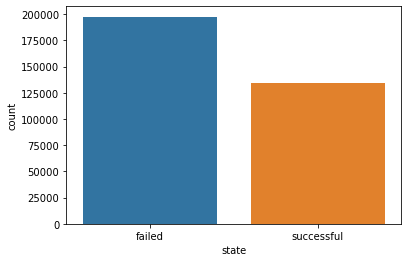

In [58]:
# As we are dealing with the classification problem, let's look at the balance of the dataset.
print(df_2018['state'].unique()) #Printing all the unique values present in the field state
print(df_2018.groupby('state').size()) # printing the counts of each category of states.
sns.countplot(x='state', data=df_2018 ) # visualising the counts of each category.

The data is slightly imbalanced.

With this we conclude the data cleaning process. Next, lets jump into the EDA

### Converting the target variable from categorical to numerical

We need to convert the state of the project to numeric which is useful for the machine learning model.

In [59]:
# Modifing value of dependent variable from categorical to numerical
df_2018.loc[df_2018['state'] == 'failed', 'state'] = 0
df_2018.loc[df_2018['state'] == 'successful', 'state'] = 1

In [60]:
# Converting the datatype of state column from object to int
df_2018['state'] = df_2018['state'].astype(int)

In [61]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331471 entries, 0 to 331475
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   category          331471 non-null  object        
 1   main_category     331471 non-null  object        
 2   currency          331471 non-null  object        
 3   deadline          331471 non-null  datetime64[ns]
 4   launched          331471 non-null  datetime64[ns]
 5   state             331471 non-null  int64         
 6   backers           331471 non-null  int64         
 7   country           331471 non-null  object        
 8   usd_pledged_real  331471 non-null  float64       
 9   usd_goal_real     331471 non-null  float64       
 10  duration_days     331471 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(4)
memory usage: 38.4+ MB


# Exploratory Data Analysis

### Plan for EDA

1. Visualize, identify and fix(drop/impute) the outliers of numerical and date columns

2. Visualize the distribution of each numerical column.

3. Figure out the correlation between the columns

4. Perform PCA

5. Do clustering if necessary

6. Answer the following research questions using visual analytics.

    a. Percentage distribution of all the project states

    b. No.of projects being launched eachweek, eachmonth
    
    c. Country-wise distribution of projects and their states

In [62]:
df_2018.head()

category main_category currency   deadline   launched  state  \
0          Poetry    Publishing      GBP 2015-10-09 2015-08-11      0   
1  Narrative Film  Film & Video      USD 2017-11-01 2017-09-02      0   
2  Narrative Film  Film & Video      USD 2013-02-26 2013-01-12      0   
3           Music         Music      USD 2012-04-16 2012-03-17      0   
4     Restaurants          Food      USD 2016-04-01 2016-02-26      1   

   backers country  usd_pledged_real  usd_goal_real  duration_days  
0        0      GB               0.0        1533.95             59  
1       15      US            2421.0       30000.00             60  
2        3      US             220.0       45000.00             45  
3        1      US               1.0        5000.00             30  
4      224      US           52375.0       50000.00             35

## 1. Visualize and deal with the outliers

### Looking in to the backers column

No handles with labels found to put in legend.


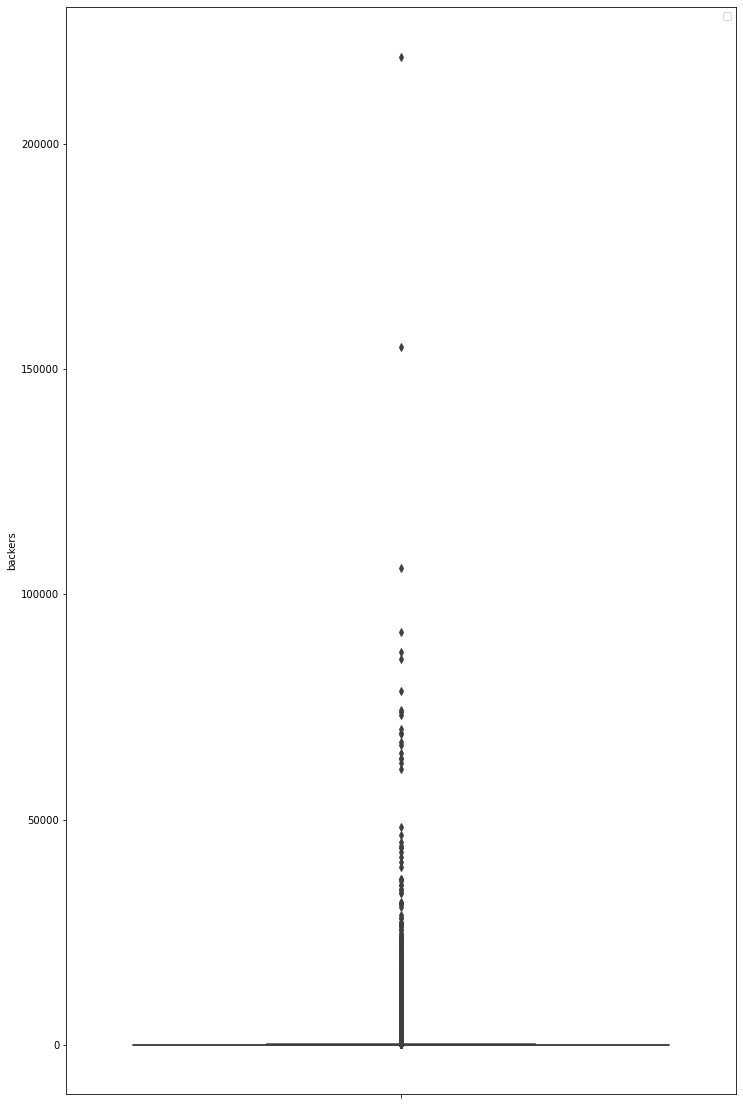

In [63]:
plt.figure(figsize=(12,20))
sns.boxplot(y='backers', data=df_2018.head(1000000), orient = "v")
plt.legend(loc=1)

There are lot of outliers in the backers column. So, we first need to remove those outliers to see the boxplot clearly. Let's calculate the upper bound and lower bound first.

### Plan for finding the outliers and dropping them.

1. First calculate the q1 and q3 values 

2. Calculate the IQR which is the difference betwee third and first quartile.

3. Find the upper and lower bound by using the formula <b>q1-(1.5 x IQR)</b> for lower the bound and <b>q3+(1.5 x IQR)</b> for the upper bound

4. Drop those outliers which are below the lowerbound and above the upper bound

In [64]:
# Calculate the first and thrid quartile values first
q1, q3 = np.percentile(df_2018['backers'],[25,75])
print("q1:", q1)
print("q3:", q3)

q1: 2.0
q3: 63.0


In [65]:
# Calculating IQR
iqr = q3-q1
print("IQR: ", iqr)

IQR:  61.0


In [66]:
# Calculating the lower and upper bounds
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

print("Lower Bound value: ", lower_bound)
print("Upper Bound value: ", upper_bound)

Lower Bound value:  -89.5
Upper Bound value:  154.5


From the above output it is clear that what ever values below -80.5 and above 139 can be treated as outlier. But, as we won't be having any negative backers for a project. We will treat the lower bound as 0. We won't look for any outliers below the lower bound.

Now, let's drop the rows wherever the backers are more than the upper bound value.

In [67]:
# dropping the outliers in backers.
print('Before dropping the outliers: ', df_2018.shape)
df_2018.drop(df_2018[df_2018['backers']> upper_bound].index, inplace=True)
print('After dropping the outliers: ', df_2018.shape)

Before dropping the outliers:  (331471, 11)
After dropping the outliers:  (292492, 11)


In [68]:
# Verifying if there are any outliers still left.
df_2018[df_2018['backers']>upper_bound]

Empty DataFrame
Columns: [category, main_category, currency, deadline, launched, state, backers, country, usd_pledged_real, usd_goal_real, duration_days]
Index: []

Now, lets try to plot the backers boxplot one more time.

<AxesSubplot:ylabel='backers'>

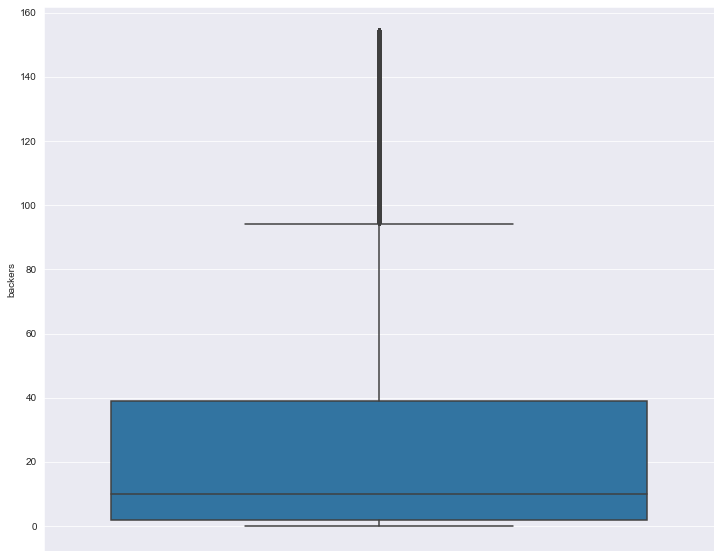

In [69]:
plt.figure(figsize=(12, 10))
sns.set_style('darkgrid')
sns.boxplot(y='backers', data=df_2018)

In the above plot there still seems to be some outliers. Lets plot multiple boxplots based on different states of the projects and see if these are really outliers of the whole dataset.

<AxesSubplot:xlabel='state', ylabel='backers'>

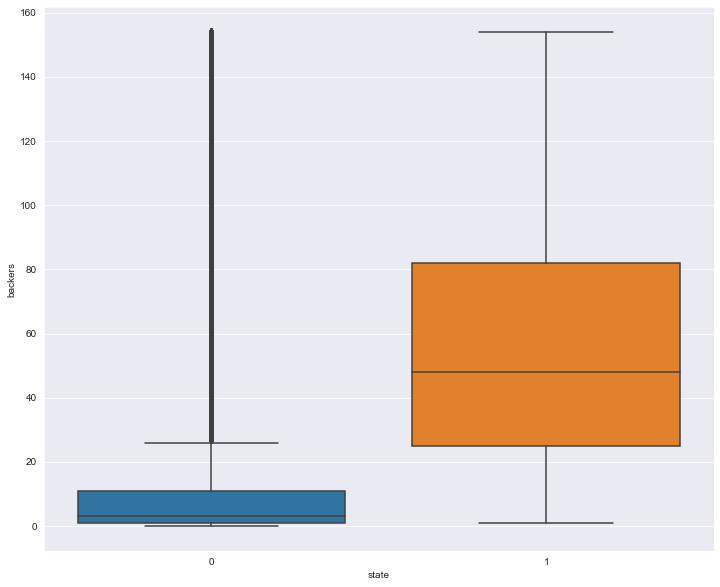

In [70]:
# Plotting the distribution of backers based on different states.
plt.figure(figsize=(12, 10))
sns.set_style('darkgrid')
sns.boxplot(x='state', y='backers', data=df_2018)

From the above plot it is clear that we should not drop any more records based on the backers as the data looks good.

### Looking in to the usd_goal_real column

<AxesSubplot:ylabel='usd_goal_real'>

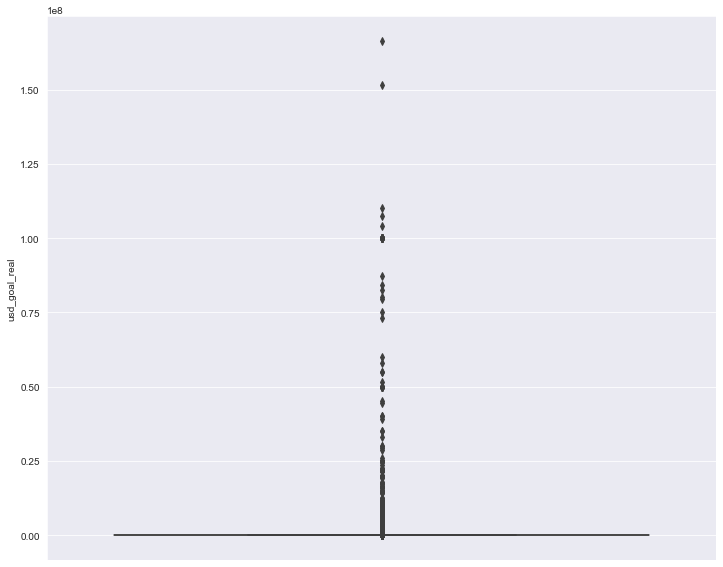

In [71]:
# Visualize if there are any outliers.
plt.figure(figsize=(12,10))
sns.boxplot(y='usd_goal_real', data=df_2018)

As we can see that there are many outliers which needs to be dropped. Lets find out the outliers and drop them in the same way as we did for the backers column.

In [72]:
# Calculate the first and thrid quartile values first
q1, q3 = np.percentile(df_2018['usd_goal_real'],[25,75])
print("q1:", q1)
print("q3:", q3)

q1: 1700.0
q3: 12500.0


In [73]:
# Calculating IQR
iqr = q3-q1
print("IQR: ", iqr)

IQR:  10800.0


In [74]:
# Calculating the lower and upper bounds
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

print("Lower Bound value: ", lower_bound)
print("Upper Bound value: ", upper_bound)

Lower Bound value:  -14500.0
Upper Bound value:  28700.0


From the above output it is clear that what ever values below -17887 and above 34732 can be treated as outlier. But, as we won't be having any project with negative goal amount. We will treat the lower bound as 0. We won't look for any outliers below the lower bound.

Now, let's drop the rows wherever the usd_goal_real are more than the upper bound value.

In [75]:
# dropping the outliers in usd_goal_real.
print('Before dropping the outliers: ', df_2018.shape)
df_2018.drop(df_2018[df_2018['usd_goal_real']> upper_bound].index, inplace=True)
print('After dropping the outliers: ', df_2018.shape)

Before dropping the outliers:  (292492, 11)
After dropping the outliers:  (255557, 11)


In [76]:
# Verifying if there are any outliers still left.
df_2018[df_2018['usd_goal_real']>upper_bound]

Empty DataFrame
Columns: [category, main_category, currency, deadline, launched, state, backers, country, usd_pledged_real, usd_goal_real, duration_days]
Index: []

Now, lets try to plot the usd_goal_real boxplot one more time.

<AxesSubplot:ylabel='usd_goal_real'>

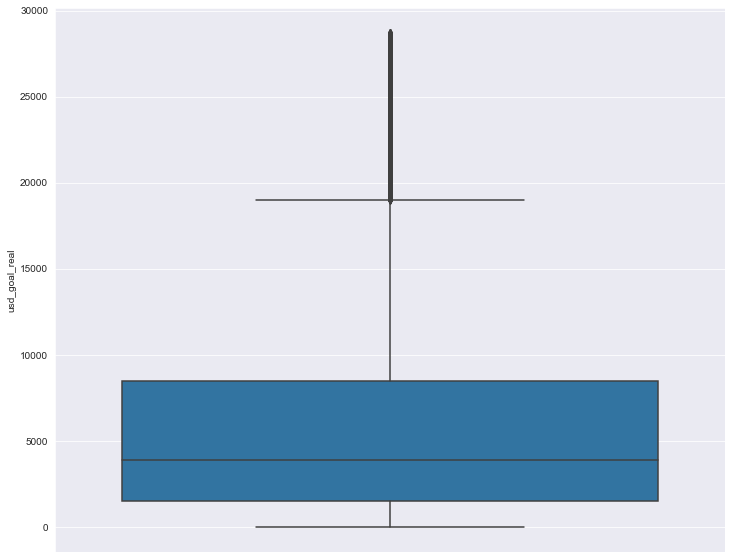

In [77]:
plt.figure(figsize=(12, 10))
sns.set_style('darkgrid')
sns.boxplot(y='usd_goal_real', data=df_2018)

Lets plot multiple boxplots based on different states of the projects.

<AxesSubplot:xlabel='state', ylabel='usd_goal_real'>

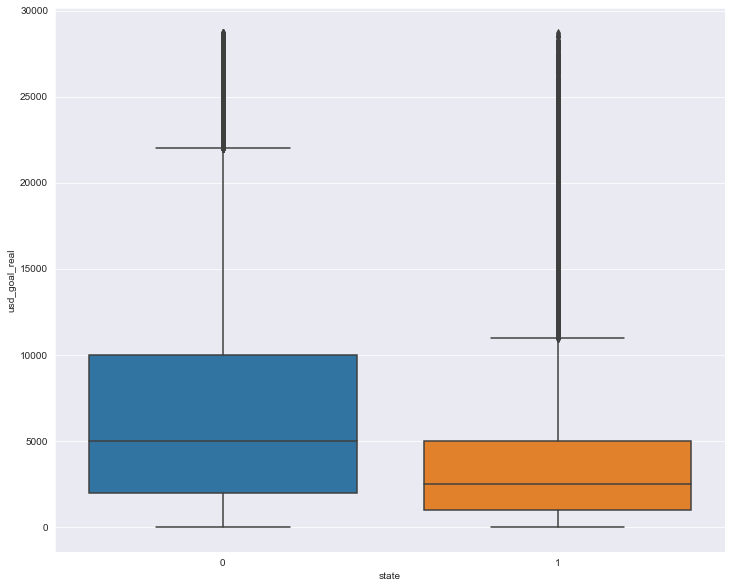

In [78]:
# Visualize if there are any outliers.
plt.figure(figsize=(12,10))
sns.boxplot(x='state', y='usd_goal_real', data=df_2018)

Although the plots in the above steps shows that there are some outliers, it's not true. Because, the outliers we are seeing in the above plot are with respect to the state column of the dataset. But, if you plot the same data with respect to someother column we will notice that the data looks good and need not be looked for any more outliers. Let's verify that by plotting the data based on the main_category.

<AxesSubplot:xlabel='main_category', ylabel='usd_goal_real'>

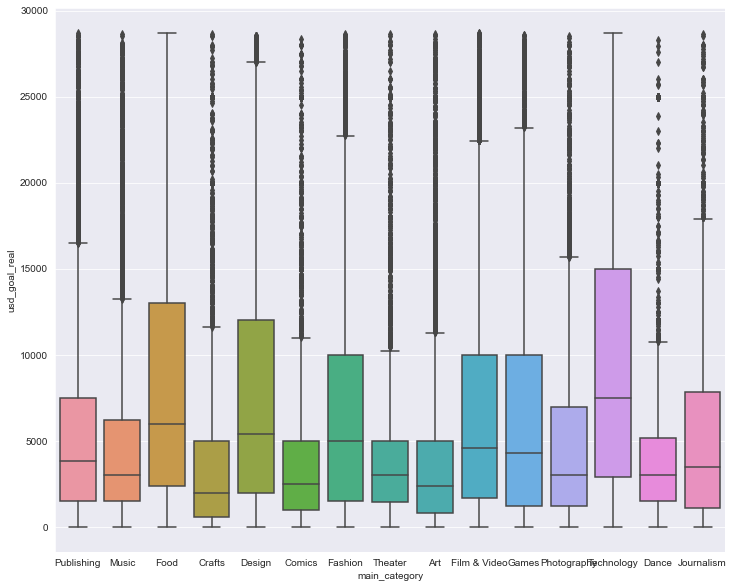

In [79]:
# Visualize if there are any outliers based on the main_category column
plt.figure(figsize=(12,10))
sns.boxplot(x='main_category', y='usd_goal_real', data=df_2018)

It is clear that the data in the usd_goal_real column is fine and we don't need to drop any more rows based on it.

### Looking in to the usd_pledged_real column

<AxesSubplot:ylabel='usd_pledged_real'>

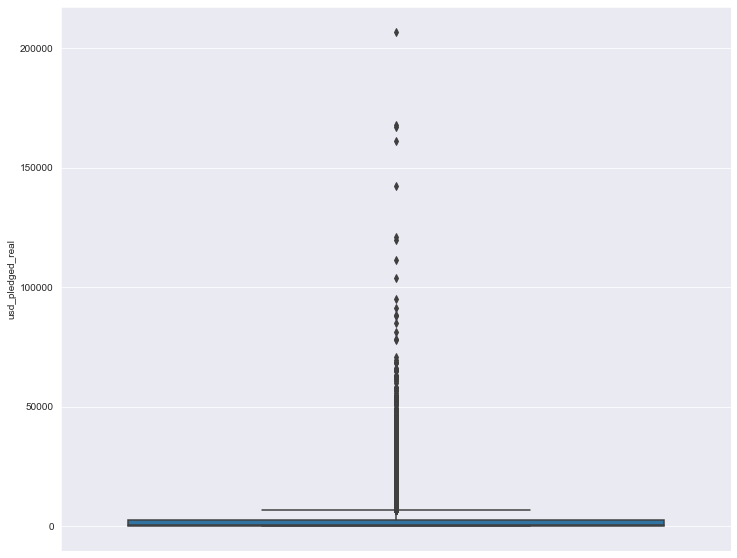

In [80]:
# Visualize if there are any outliers.
plt.figure(figsize=(12,10))
sns.boxplot(y='usd_pledged_real', data=df_2018)

As we can see that there are many outliers which needs to be dropped. Lets find out the outliers and drop them in the same way as we did for the backers and usd_goal_real columns.

In [81]:
# Calculate the first and thrid quartile values first
q1, q3 = np.percentile(df_2018['usd_pledged_real'],[25,75])
print("q1:", q1)
print("q3:", q3)

q1: 35.0
q3: 2632.0


In [82]:
# Calculating IQR
iqr = q3-q1
print("IQR: ", iqr)

IQR:  2597.0


In [83]:
# Calculating the lower and upper bounds
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

print("Lower Bound value: ", lower_bound)
print("Upper Bound value: ", upper_bound)

Lower Bound value:  -3860.5
Upper Bound value:  6527.5


From the above output it is clear that what ever values below lower_bound and above upper_bound can be treated as outlier. But, as we won't be having any project with negative pledged amount. We will treat the lower bound as 0. We won't look for any outliers below the lower bound.

Now, let's drop the rows wherever the usd_pledged_real are more than the upper bound value.

In [84]:
# dropping the outliers in usd_goal_real.
print('Before dropping the outliers: ', df_2018.shape)
df_2018.drop(df_2018[df_2018['usd_pledged_real']> upper_bound].index, inplace=True)
print('After dropping the outliers: ', df_2018.shape)

Before dropping the outliers:  (255557, 11)
After dropping the outliers:  (231824, 11)


In [85]:
# Verifying if there are any outliers still left.
df_2018[df_2018['usd_pledged_real']>upper_bound]

Empty DataFrame
Columns: [category, main_category, currency, deadline, launched, state, backers, country, usd_pledged_real, usd_goal_real, duration_days]
Index: []

Now, lets try to plot the usd_goal_real boxplot one more time.

<AxesSubplot:ylabel='usd_pledged_real'>

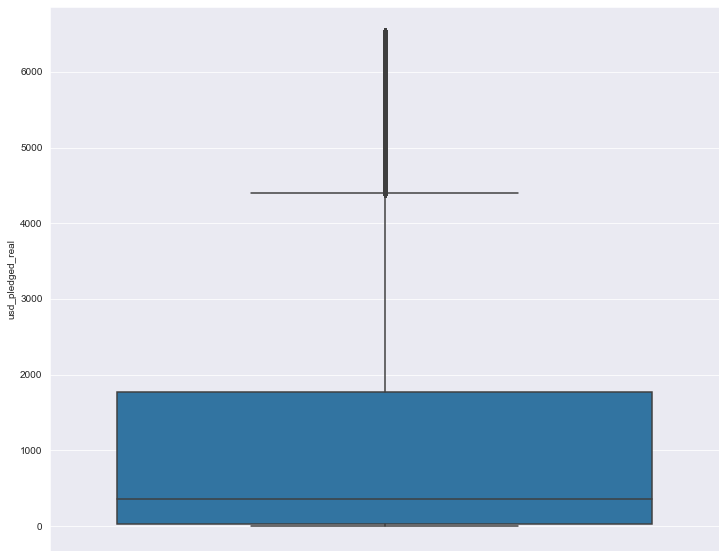

In [86]:
plt.figure(figsize=(12, 10))
sns.set_style('darkgrid')
sns.boxplot(y='usd_pledged_real', data=df_2018)

Lets plot multiple boxplots based on different states of the projects.

<AxesSubplot:xlabel='state', ylabel='usd_pledged_real'>

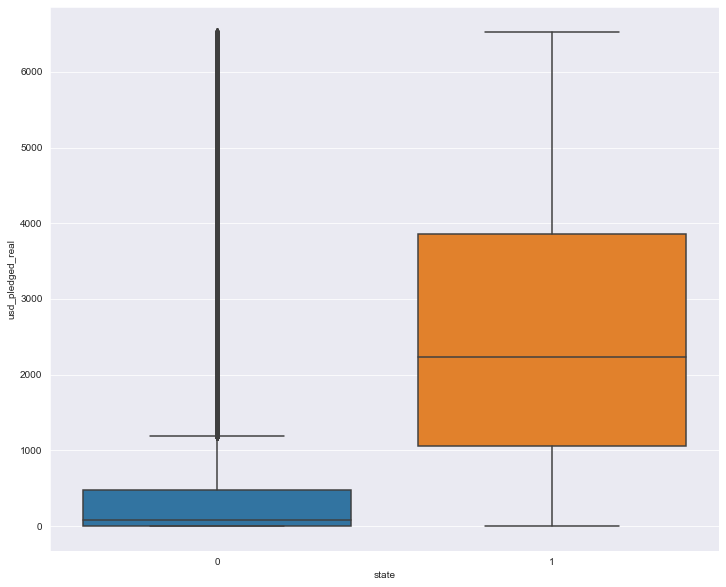

In [87]:
# Visualize if there are any outliers.
plt.figure(figsize=(12,10))
sns.boxplot(x='state', y='usd_pledged_real', data=df_2018)

From the above plot it is clear that we should not drop any more records based on the backers as the data looks good.

### Let's look at the outliers in date columns.

<Figure size 864x720 with 0 Axes>

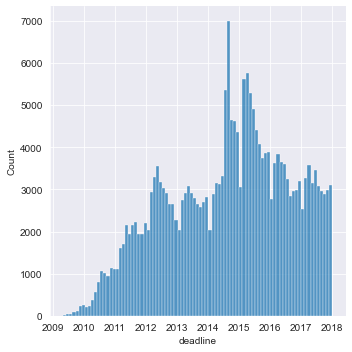

In [88]:
# Distribution plot for the deadline column
plt.figure(figsize=(12,10))
sns.displot(x='deadline', data=df_2018)

The kickstarter platform was launched on april 2009, which is the launch date of kickstarter platform. So, there can never be any dates below 2009. So, all the dates in **deadline** column can be presumed as correct and needs no correction and doesn't exhibit any outliers.

<Figure size 864x720 with 0 Axes>

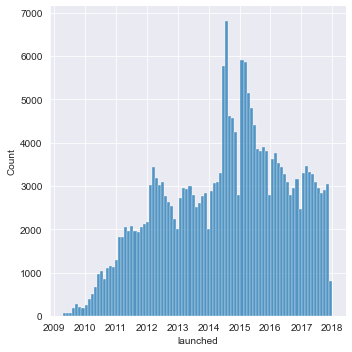

In [89]:
# Distribution plot for the launched column
plt.figure(figsize=(12,10))
sns.displot(x='launched', data=df_2018)

The kickstarter platform was launched on april 2009, which is the launch date of kickstarter platform. So, there can never be any dates below 2009. So, all the dates in **launched** column can be presumed as correct and needs no correction and doesn't exhibit any outliers.

Let's look at our main dataframe one more time

In [90]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231824 entries, 0 to 331475
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   category          231824 non-null  object        
 1   main_category     231824 non-null  object        
 2   currency          231824 non-null  object        
 3   deadline          231824 non-null  datetime64[ns]
 4   launched          231824 non-null  datetime64[ns]
 5   state             231824 non-null  int64         
 6   backers           231824 non-null  int64         
 7   country           231824 non-null  object        
 8   usd_pledged_real  231824 non-null  float64       
 9   usd_goal_real     231824 non-null  float64       
 10  duration_days     231824 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(4)
memory usage: 29.3+ MB


Let's visualise the state column one more time

[0 1]
state
0    156469
1     75355
dtype: int64


<AxesSubplot:xlabel='state', ylabel='count'>

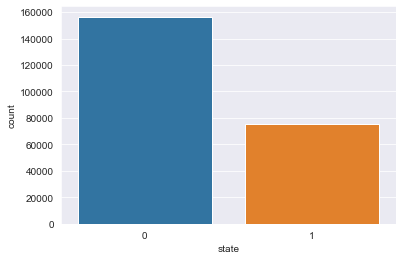

In [91]:
# As we are dealing with the classification problem, let's look at the balance of the dataset.
print(df_2018['state'].unique()) #Printing all the unique values present in the field state
print(df_2018.groupby('state').size()) # printing the counts of each category of states.
sns.countplot(x='state', data=df_2018 ) # visualising the counts of each category.

In [92]:
df_2018.head()

category main_category currency   deadline   launched  state  backers  \
0      Poetry    Publishing      GBP 2015-10-09 2015-08-11      0        0   
3       Music         Music      USD 2012-04-16 2012-03-17      0        1   
5        Food          Food      USD 2014-12-21 2014-12-01      1       16   
6      Drinks          Food      USD 2016-03-17 2016-02-01      0       40   
7  Nonfiction    Publishing      CAD 2013-10-09 2013-09-09      0        0   

  country  usd_pledged_real  usd_goal_real  duration_days  
0      GB               0.0        1533.95             59  
3      US               1.0        5000.00             30  
5      US            1205.0        1000.00             20  
6      US             453.0       25000.00             45  
7      CA               0.0        2406.39             30

### Looking in to the duration_days outliers

<AxesSubplot:ylabel='duration_days'>

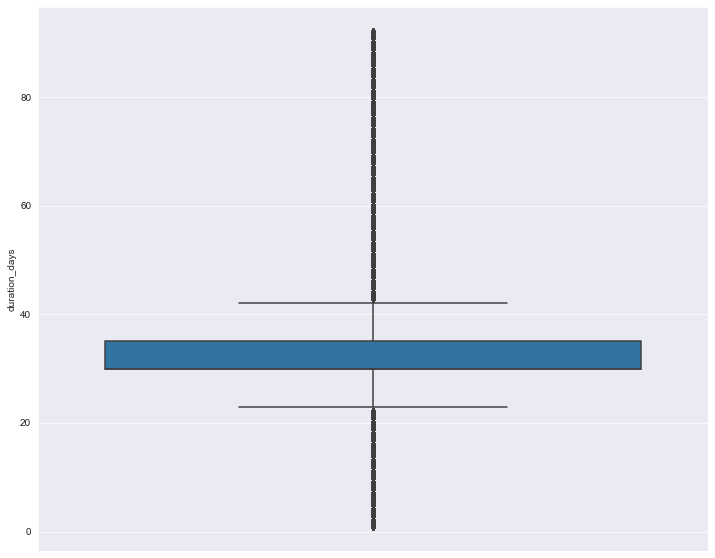

In [93]:
plt.figure(figsize=(12,10))
sns.boxplot(y='duration_days', data=df_2018  )

In [94]:
# Calculate the first and thrid quartile values first
q1, q3 = np.percentile(df_2018['duration_days'],[25,75])
print("q1:", q1)
print("q3:", q3)

q1: 30.0
q3: 35.0


In [95]:
# Calculating IQR
iqr = q3-q1
print("IQR: ", iqr)

IQR:  5.0


In [96]:
# Calculating the lower and upper bounds
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

print("Lower Bound value: ", lower_bound)
print("Upper Bound value: ", upper_bound)

Lower Bound value:  22.5
Upper Bound value:  42.5


From the above output it is clear that what ever values below 22.5 and above 42.5 can be treated as outlier. 

Now, let's drop the rows wherever the duration_days are outside the upper and lower_bound values.

In [97]:
# Viewing the number of outliers.
df_2018.query('duration_days<@lower_bound or duration_days>@upper_bound')

category main_category currency   deadline   launched  state  \
0                 Poetry    Publishing      GBP 2015-10-09 2015-08-11      0   
5                   Food          Food      USD 2014-12-21 2014-12-01      1   
6                 Drinks          Food      USD 2016-03-17 2016-02-01      0   
15                 Music         Music      USD 2012-08-17 2012-08-02      1   
21                Comics        Comics      USD 2014-11-12 2014-10-23      1   
...                  ...           ...      ...        ...        ...    ...   
331454       Photography   Photography      USD 2011-01-08 2010-11-08      0   
331462    Product Design        Design      USD 2015-12-15 2015-11-23      1   
331464  Children's Books    Publishing      USD 2013-11-30 2013-10-18      1   
331466    Narrative Film  Film & Video      USD 2017-04-09 2017-02-08      0   
331473    Narrative Film  Film & Video      USD 2010-08-16 2010-07-01      0   

        backers country  usd_pledged_real  usd_goal_real  duration_days  
0             0      GB              0.00        1533.95             59  
5            16      US           1205.00        1000.00             20  
6            40      US            453.00       25000.00             45  
15            7      US            250.00         250.00             15  
21           66      US            701.66         175.00             20  
...         ...     ...               ...            ...            ...  
331454       37      US           3531.00        4000.00             61  
331462      120      US           6169.00        3500.00             22  
331464       31      US           1732.02         950.00             43  
331466        6      US            135.00         500.00             60  
331473        1      US             20.00       15000.00             46  

[75003 rows x 11 columns]

There are 84394 outliers. Lets drop them

#### Removing the duration_days Outliers

In [98]:
# dropping the outliers in duration_days.
print('Before dropping the outliers: ', df_2018.shape)
df_2018.drop(df_2018[df_2018['duration_days']< lower_bound].index, inplace=True)
df_2018.drop(df_2018[df_2018['duration_days']> upper_bound].index, inplace=True)
print('After dropping the outliers: ', df_2018.shape)

Before dropping the outliers:  (231824, 11)
After dropping the outliers:  (156821, 11)


In [99]:
# Verifying if there are any outliers still left.
df_2018.query('duration_days<@lower_bound or duration_days>@upper_bound')

Empty DataFrame
Columns: [category, main_category, currency, deadline, launched, state, backers, country, usd_pledged_real, usd_goal_real, duration_days]
Index: []

In [100]:
df_2018.state.unique()

array([0, 1])

## 2.Visualize the distribution of each numerical column.

### Visualizing the share of each State category

Let's visualize the share of each state of projects using a piechart

In [101]:
state = round(df_2018["state"].value_counts() / len(df_2018["state"]) * 100,2)

labels = list(state.index)
values = list(state.values)

trace1 = go.Pie(labels=labels, values=values, marker=dict(colors=['red']))

layout = go.Layout(title='Distribuition of States', legend=dict(orientation="h"));

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

We can see that there are only 31.6% of projects are successful. 

More than 65% percent of projects ended up failing. 

### Distribution of Goal amount

Can we look at the goal amount alone and predict whether a project is going to be successful or failure?

To answer this question lets plot the distribution of the goal_amount of the projects in respective to each state and main category of the project and try to answer the question. 

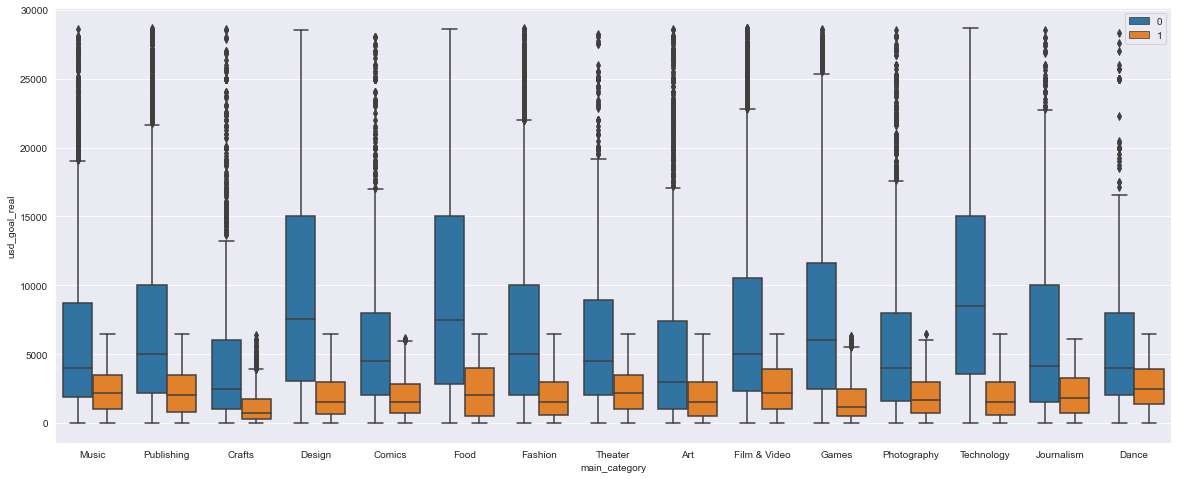

In [102]:
# visualising the goal amound distribution in both successful and failure projects.
plt.figure(figsize=(20,8))
sns.boxplot(x='main_category', y='usd_goal_real', hue='state', data=df_2018)
plt.legend(loc=1)

From the above plot we can see that the mean of each box plot in failure projects is higher than the successful projects.
This indicates that the average goal of the projects in each main_category are higher in failed projects. 

Thus, in order to have a project succeed in the mission it has to have a lower goal amount, which is practical and achievable.  


As the upper bound of all the successful projects are never crossing thier Q3 of the corresponding category failed projects, we can safely conclude that whenever a project is having a goal higher than the Q3 of the similar main category failed projects, then that project is going to be a failure.

### Visualizing the country-wise distribution of the projects

Plot and identify from the most successful projects has come from 

<AxesSubplot:xlabel='country', ylabel='count'>

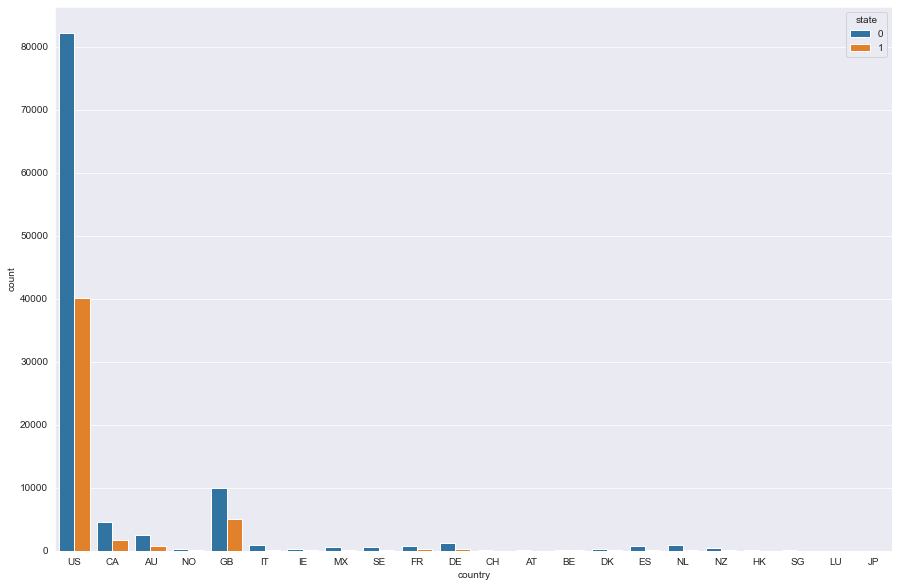

In [103]:
# Visualizing the country-wise projects count
plt.figure(figsize=(15,10))
sns.countplot(x='country', hue='state', data=df_2018)

Projects from the US, Great Britain, Canada & Australia has seen huge sucess than any other countries. However, in all of the countries the failed projects are more than successful ones.

There isn't even a single country which has more projects getting success than the failures.

### Visualising the total amount pledged across different country projects.

Let's plot a barplot with the pledged amount across different countries and find out whether we can answer the top coutries receiving the funding

In [104]:
# bar plot with matplotlib
#plt.figure(figsize=(10,6))
#plt.bar('country', 'usd_pledged_real',data=df_2018.sort_values('usd_pledged_real'))
#plt.xlabel("Country", size=15)
#plt.ylabel("Pledged amount in US Dollars", size=15)
#plt.title("Bar plot in Ascending Order with Matplotlib", size=18)
#plt.savefig("bar_plot_matplotlib_ascending_order_Python.png")

Irrespective of the success or failure the projects from USA, Mexico and Canada has received top funding than the others. The projets from Japan has received the lowest funding.

### Visualising the backers distribution acorss different countries and main-categories

Let's try to visualize the backers distribution across the countries and categories and try to answer the following additional research questions.

1. Projects from which countries have been receiving the highest and lowest backers?
2. What are the main-categories that backers are interested about?

In [105]:
# creating the country-wise groups
group_country = df_2018.groupby('country')
group_country

In [106]:
# creating a dataframe with all the average backers for each country.
mean_backers_country = group_country.mean().sort_values(['backers'], ascending=False)
mean_backers_country = mean_backers_country.reset_index() # making the country column by resetting the index
mean_backers_country.head()

country     state    backers  usd_pledged_real  usd_goal_real  duration_days
0      LU  0.400000  31.600000       1655.936000    6252.395500      32.100000
1      SG  0.252688  24.569892       1191.403656    5919.193871      30.946237
2      US  0.328023  22.728604       1284.055636    5713.340080      30.696815
3      JP  0.153846  22.000000       1108.210000    8321.246923      30.692308
4      GB  0.337299  21.442775       1091.933737    5172.046309      30.450884

<AxesSubplot:xlabel='country', ylabel='backers'>

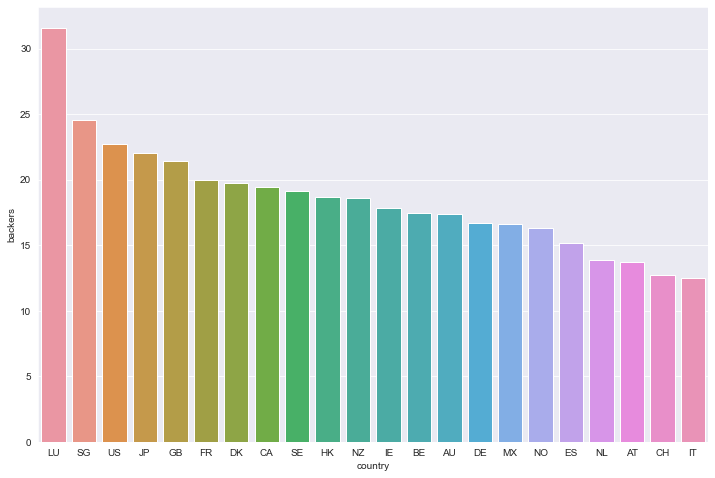

In [107]:
# Plotting the average-backers vs country
plt.figure(figsize=(12,8))
sns.barplot(x='country', y='backers', data=mean_backers_country)

From the above plot it is clear that the average number of backers for a project are higher for the Luxembourg. Singapore and USA are next countries to have higher average number of backers after Luxembourg

Among all the coutries, projects from Italy have received the lowest number of supporters

In [108]:
# Creating the groups for each main_category
group_cat = df_2018.groupby('main_category')
group_cat

In [109]:
# creating a dataframe with all the average backers for each main-category.
mean_backers_cat = group_cat.mean().sort_values(['backers'], ascending=False)
mean_backers_cat = mean_backers_cat.reset_index() # making the country column by resetting the index
mean_backers_cat.head()

main_category     state    backers  usd_pledged_real  usd_goal_real  \
0        Comics  0.493962  42.261395       1623.161437    4014.372659   
1         Dance  0.638710  31.894624       2108.086995    3811.461425   
2       Theater  0.624805  31.236914       1954.368518    3915.590982   
3         Games  0.234596  29.101872       1176.949750    6634.059140   
4         Music  0.461581  27.537606       1579.740851    4425.630964   

   duration_days  
0      30.880016  
1      30.658602  
2      30.559375  
3      30.668981  
4      30.945752

<AxesSubplot:xlabel='main_category', ylabel='backers'>

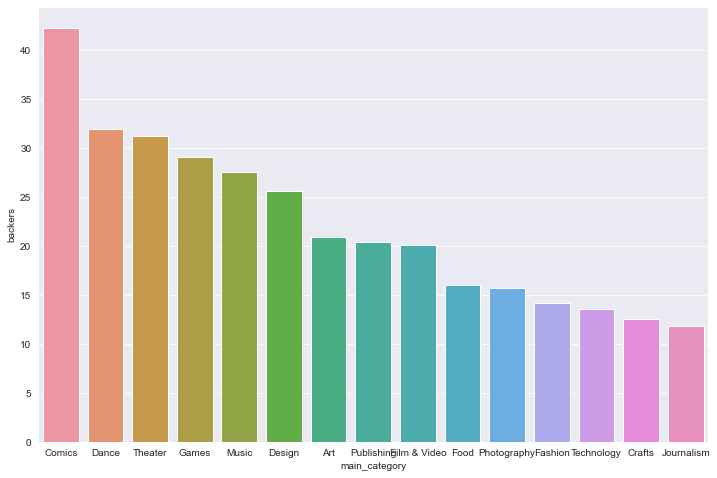

In [110]:
# Plotting the average-backers vs main-category
plt.figure(figsize=(12,8))
sns.barplot(x='main_category', y='backers', data=mean_backers_cat)

From the above plot we can deduce that the **comics** main_category has received the average higher number of backers pre project than all other main-categories. Whereas **Journalism** is the least intereseted category for the backers.

## 3. Figure out the correlation between the columns

Let's plot the pairplots between all the numerical columns and figure out if we can reach some conclusions.

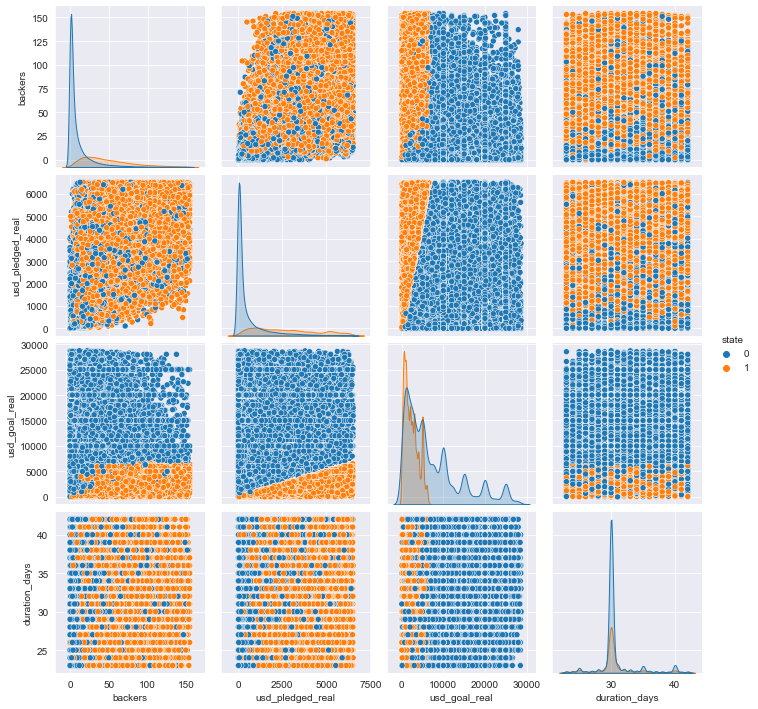

In [111]:
# Plotting the pairplots
sns.pairplot(df_2018, hue='state')

The plots above are inconclusive and we can not really infer anything from it. Let's try in a different way

Let's plot the pairgrid and see if we can find something in it.

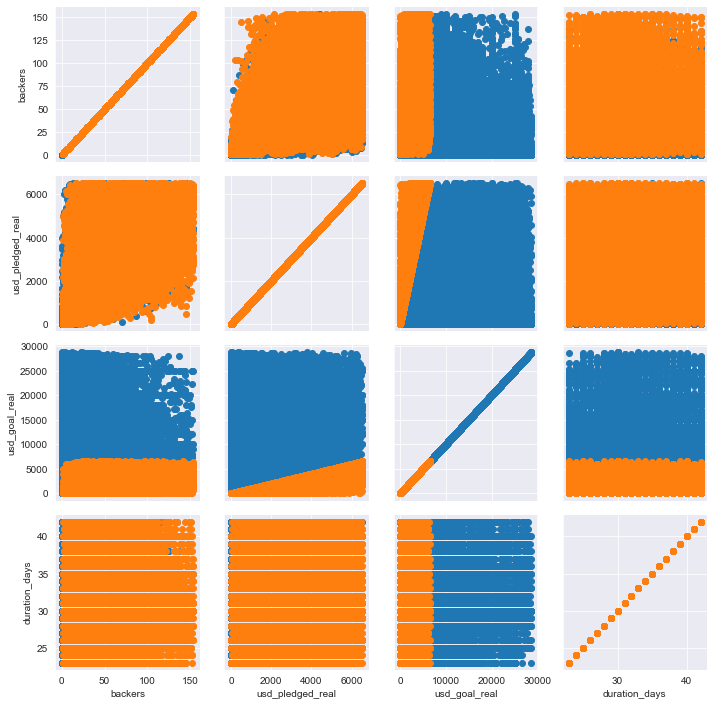

In [112]:
# Plotting pairgrid
df1 = sns.PairGrid(df_2018, hue='state')
df1.map(plt.scatter)

**Observation:**

Looking at the plot usd_goal_real vs backers, duration_days vs usd_goal_real, we can conclude that **if the goal amount is smaller then the project has a higher chance of getting failed.** May be the backers are not taking the projects with lower goals as seriously as the ones with higher goal amounts. 

## Duration days effect on the success of the project

Let's explore the duration days and try to answer the following question.

**Does the duaration days has any effect on the success of the project?**

To answer this question lets plot the countplot and see at what duration more number of successful projects are present.

<AxesSubplot:xlabel='duration_days', ylabel='count'>

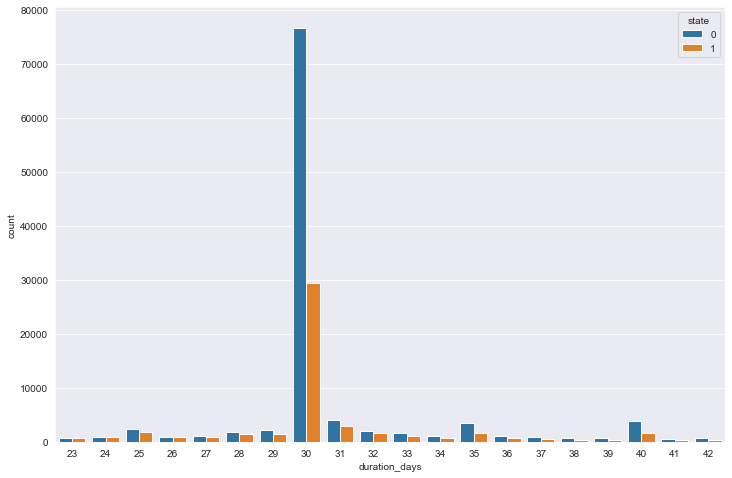

In [113]:
# Plotting the countplot of duration_days
plt.figure(figsize=(12,8))
sns.countplot(x='duration_days',hue='state', data=df_2018)

From the above plot it is clear that the more number of successful projects are lying at the 30 days mark. However when we look closely, we can find the highest number of projects that failed are also having the duration as 30days. So, we can conclude that **the duration-days has no effect on the success or failure of the project.**

## Encoding the Categorical Columns

As there are many categorical columns, let's encode them one-by-one using one-hot encoder technique

First let's create a copy of our main dataframe df_2018 and play with it.

In [114]:
ks = df_2018.copy(deep=True) # copying the datafrme with deep copy option
ks.reset_index(drop=True, inplace=True) # Resetting the index by dropping the old index
ks.head()

category main_category currency   deadline   launched  state  backers  \
0        Music         Music      USD 2012-04-16 2012-03-17      0        1   
1   Nonfiction    Publishing      CAD 2013-10-09 2013-09-09      0        0   
2       Crafts        Crafts      USD 2014-10-02 2014-09-02      0        0   
3       Design        Design      USD 2015-02-28 2015-01-29      0       11   
4  Comic Books        Comics      USD 2014-11-08 2014-10-09      0       16   

  country  usd_pledged_real  usd_goal_real  duration_days  
0      US               1.0        5000.00             30  
1      CA               0.0        2406.39             30  
2      US               0.0        5000.00             30  
3      US             664.0        2500.00             30  
4      US             395.0        1500.00             30

Finding out how many different categories are existing in our main_category column

In [115]:
cat_cols = ["main_category", "category", "country","currency"]
cat_cols_encoded = []
for col in cat_cols:
  cat_cols_encoded += [f"{col[0:8]}_{cat}" for cat in list(ks[col].unique())]

cat_cols_encoded

['main_cat_Music',
 'main_cat_Publishing',
 'main_cat_Crafts',
 'main_cat_Design',
 'main_cat_Comics',
 'main_cat_Food',
 'main_cat_Fashion',
 'main_cat_Theater',
 'main_cat_Art',
 'main_cat_Film & Video',
 'main_cat_Games',
 'main_cat_Photography',
 'main_cat_Technology',
 'main_cat_Journalism',
 'main_cat_Dance',
 'category_Music',
 'category_Nonfiction',
 'category_Crafts',
 'category_Design',
 'category_Comic Books',
 'category_Art Books',
 'category_Food',
 'category_Childrenswear',
 'category_Theater',
 'category_Drinks',
 'category_DIY',
 'category_Comics',
 'category_Food Trucks',
 'category_Product Design',
 'category_Public Art',
 'category_Webseries',
 'category_Illustration',
 'category_Tabletop Games',
 'category_Documentary',
 'category_People',
 'category_Art',
 'category_Photography',
 'category_Fiction',
 'category_Accessories',
 'category_Software',
 'category_Weaving',
 'category_Jazz',
 'category_Anthologies',
 'category_Film & Video',
 'category_Shorts',
 'category

In [116]:
oh_encoder = OneHotEncoder(sparse=False, handle_unknown='error')
encoded_cols = oh_encoder.fit_transform(ks[cat_cols])
df_enc = pd.DataFrame(encoded_cols, columns=cat_cols_encoded)
df_enc

main_cat_Music  main_cat_Publishing  main_cat_Crafts  main_cat_Design  \
0                  0.0                  0.0              0.0              0.0   
1                  0.0                  0.0              0.0              0.0   
2                  0.0                  0.0              1.0              0.0   
3                  0.0                  0.0              0.0              0.0   
4                  0.0                  1.0              0.0              0.0   
...                ...                  ...              ...              ...   
156816             0.0                  0.0              0.0              0.0   
156817             0.0                  0.0              0.0              0.0   
156818             0.0                  0.0              0.0              0.0   
156819             0.0                  0.0              0.0              0.0   
156820             1.0                  0.0              0.0              0.0   

        main_cat_Comics  main_cat_Food  main_cat_Fashion  main_cat_Theater  \
0                   0.0            0.0               0.0               0.0   
1                   0.0            0.0               0.0               0.0   
2                   0.0            0.0               0.0               0.0   
3                   1.0            0.0               0.0               0.0   
4                   0.0            0.0               0.0               0.0   
...                 ...            ...               ...               ...   
156816              0.0            0.0               1.0               0.0   
156817              0.0            0.0               0.0               1.0   
156818              0.0            0.0               1.0               0.0   
156819              0.0            0.0               0.0               0.0   
156820              0.0            0.0               0.0               0.0   

        main_cat_Art  main_cat_Film & Video  ...  currency_GBP  currency_EUR  \
0                0.0                    0.0  ...           0.0           0.0   
1                0.0                    0.0  ...           0.0           0.0   
2                0.0                    0.0  ...           0.0           0.0   
3                0.0                    0.0  ...           0.0           0.0   
4                0.0                    0.0  ...           0.0           0.0   
...              ...                    ...  ...           ...           ...   
156816           0.0                    0.0  ...           0.0           0.0   
156817           0.0                    0.0  ...           0.0           0.0   
156818           0.0                    0.0  ...           0.0           0.0   
156819           0.0                    0.0  ...           0.0           0.0   
156820           0.0                    0.0  ...           0.0           0.0   

        currency_MXN  currency_SEK  currency_CHF  currency_DKK  currency_NZD  \
0                0.0           0.0           0.0           0.0           0.0   
1                0.0           0.0           0.0           0.0           0.0   
2                0.0           0.0           0.0           0.0           0.0   
3                0.0           0.0           0.0           0.0           0.0   
4                0.0           0.0           0.0           0.0           0.0   
...              ...           ...           ...           ...           ...   
156816           0.0           0.0           0.0           0.0           0.0   
156817           0.0           0.0           0.0           0.0           0.0   
156818           0.0           0.0           0.0           0.0           0.0   
156819           0.0           0.0           0.0           0.0           0.0   
156820           0.0           0.0           0.0           0.0           0.0   

        currency_HKD  currency_SGD  currency_JPY  
0                0.0           0.0           1.0  
1                0.0           0.0           0.0  
2                0.0   

In [117]:
ks_oh = ks.join(df_enc)
ks_oh

category main_category currency   deadline   launched  state  \
0                 Music         Music      USD 2012-04-16 2012-03-17      0   
1            Nonfiction    Publishing      CAD 2013-10-09 2013-09-09      0   
2                Crafts        Crafts      USD 2014-10-02 2014-09-02      0   
3                Design        Design      USD 2015-02-28 2015-01-29      0   
4           Comic Books        Comics      USD 2014-11-08 2014-10-09      0   
...                 ...           ...      ...        ...        ...    ...   
156816      Documentary  Film & Video      USD 2012-03-16 2012-02-15      0   
156817      Small Batch          Food      USD 2017-04-19 2017-03-20      0   
156818   Narrative Film  Film & Video      USD 2011-07-19 2011-06-22      0   
156819       Technology    Technology      USD 2016-02-13 2016-01-13      0   
156820  Performance Art           Art      USD 2011-08-16 2011-07-19      0   

        backers country  usd_pledged_real  usd_goal_real  ...  currency_GBP  \
0             1      US               1.0        5000.00  ...           0.0   
1             0      CA               0.0        2406.39  ...           0.0   
2             0      US               0.0        5000.00  ...           0.0   
3            11      US             664.0        2500.00  ...           0.0   
4            16      US             395.0        1500.00  ...           0.0   
...         ...     ...               ...            ...  ...           ...   
156816        1      US              25.0        1700.00  ...           0.0   
156817        4      US             154.0        6500.00  ...           0.0   
156818        5      US             155.0        1500.00  ...           0.0   
156819        6      US             200.0       15000.00  ...           0.0   
156820       17      US             524.0        2000.00  ...           0.0   

        currency_EUR  currency_MXN  currency_SEK  currency_CHF  currency_DKK  \
0                0.0           0.0           0.0           0.0           0.0   
1                0.0           0.0           0.0           0.0           0.0   
2                0.0           0.0           0.0           0.0           0.0   
3                0.0           0.0           0.0           0.0           0.0   
4                0.0           0.0           0.0           0.0           0.0   
...              ...           ...           ...           ...           ...   
156816           0.0           0.0           0.0           0.0           0.0   
156817           0.0           0.0           0.0           0.0           0.0   
156818           0.0           0.0           0.0           0.0           0.0   
156819           0.0           0.0           0.0           0.0           0.0   
156820           0.0           0.0           0.0           0.0           0.0   

        currency_NZD  currency_HKD  currency_SGD  currency_JPY  
0                0.0           0.0           0.0           1.0  
1                0.0           0.0           0.0           0.0  
2                0.0           0.0           0.0           1.0  
3                0.0           0.0           0.0           1.0  
4                0.0           0.0           0.0           1.0  
...              ...           ...           ...           ...  
156816           0.0           0.0           0.0           1.0  
156817           0.0           0.0           0.0           1.0  
156818           0.0           0.0           0.0           1.0  
156819           0.0           0.0           0.0           1.0  
156820           0.0           0.0           0.0           1.0  

[156821 rows x 221 columns]

## Feature Scaling

Our dataset consists of columns backers, usd_pledged_real and usd_goal_real in different scales. As we will be using classificaiton techniques dependent on the distance based modelling, we need to scale these columns in order to avoid the model being biased towards the column with high range of values.

In [118]:
ks_oh.head()

category main_category currency   deadline   launched  state  backers  \
0        Music         Music      USD 2012-04-16 2012-03-17      0        1   
1   Nonfiction    Publishing      CAD 2013-10-09 2013-09-09      0        0   
2       Crafts        Crafts      USD 2014-10-02 2014-09-02      0        0   
3       Design        Design      USD 2015-02-28 2015-01-29      0       11   
4  Comic Books        Comics      USD 2014-11-08 2014-10-09      0       16   

  country  usd_pledged_real  usd_goal_real  ...  currency_GBP  currency_EUR  \
0      US               1.0        5000.00  ...           0.0           0.0   
1      CA               0.0        2406.39  ...           0.0           0.0   
2      US               0.0        5000.00  ...           0.0           0.0   
3      US             664.0        2500.00  ...           0.0           0.0   
4      US             395.0        1500.00  ...           0.0           0.0   

   currency_MXN  currency_SEK  currency_CHF  currency_DKK  currency_NZD  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   currency_HKD  currency_SGD  currency_JPY  
0           0.0           0.0           1.0  
1           0.0           0.0           0.0  
2           0.0           0.0           1.0  
3           0.0           0.0           1.0  
4           0.0           0.0           1.0  

[5 rows x 221 columns]

Let's split the data frame in to X and y, so that we can easily split in to train and test set later

In [119]:
# Splitting the data in X and y
X = ks_oh.iloc[:,6:]
y = ks_oh.iloc[:, 5]

In [120]:
X.head()

backers country  usd_pledged_real  usd_goal_real  duration_days  \
0        1      US               1.0        5000.00             30   
1        0      CA               0.0        2406.39             30   
2        0      US               0.0        5000.00             30   
3       11      US             664.0        2500.00             30   
4       16      US             395.0        1500.00             30   

   main_cat_Music  main_cat_Publishing  main_cat_Crafts  main_cat_Design  \
0             0.0                  0.0              0.0              0.0   
1             0.0                  0.0              0.0              0.0   
2             0.0                  0.0              1.0              0.0   
3             0.0                  0.0              0.0              0.0   
4             0.0                  1.0              0.0              0.0   

   main_cat_Comics  ...  currency_GBP  currency_EUR  currency_MXN  \
0              0.0  ...           0.0           0.0           0.0   
1              0.0  ...           0.0           0.0           0.0   
2              0.0  ...           0.0           0.0           0.0   
3              1.0  ...           0.0           0.0           0.0   
4              0.0  ...           0.0           0.0           0.0   

   currency_SEK  currency_CHF  currency_DKK  currency_NZD  currency_HKD  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   currency_SGD  currency_JPY  
0           0.0           1.0  
1           0.0           0.0  
2           0.0           1.0  
3           0.0           1.0  
4           0.0           1.0  

[5 rows x 215 columns]

As the country column is not necessary, we will drop that.

In [121]:
# Dropping the country column from X
X.drop(['country'], inplace=True, axis=1)

In [122]:
X.head()

backers  usd_pledged_real  usd_goal_real  duration_days  main_cat_Music  \
0        1               1.0        5000.00             30             0.0   
1        0               0.0        2406.39             30             0.0   
2        0               0.0        5000.00             30             0.0   
3       11             664.0        2500.00             30             0.0   
4       16             395.0        1500.00             30             0.0   

   main_cat_Publishing  main_cat_Crafts  main_cat_Design  main_cat_Comics  \
0                  0.0              0.0              0.0              0.0   
1                  0.0              0.0              0.0              0.0   
2                  0.0              1.0              0.0              0.0   
3                  0.0              0.0              0.0              1.0   
4                  1.0              0.0              0.0              0.0   

   main_cat_Food  ...  currency_GBP  currency_EUR  currency_MXN  currency_SEK  \
0            0.0  ...           0.0           0.0           0.0           0.0   
1            0.0  ...           0.0           0.0           0.0           0.0   
2            0.0  ...           0.0           0.0           0.0           0.0   
3            0.0  ...           0.0           0.0           0.0           0.0   
4            0.0  ...           0.0           0.0           0.0           0.0   

   currency_CHF  currency_DKK  currency_NZD  currency_HKD  currency_SGD  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   currency_JPY  
0           1.0  
1           0.0  
2           1.0  
3           1.0  
4           1.0  

[5 rows x 214 columns]

### Extracting the column names of the dataframe X

Next we have to scale the data in X. But while doing that we will get the X as numpy array. So, in order to convert again it to a dataframe we will first extract the column names of the dataframe X before scaling.

In [123]:
X_columns = list(X.columns)
X_columns

['backers',
 'usd_pledged_real',
 'usd_goal_real',
 'duration_days',
 'main_cat_Music',
 'main_cat_Publishing',
 'main_cat_Crafts',
 'main_cat_Design',
 'main_cat_Comics',
 'main_cat_Food',
 'main_cat_Fashion',
 'main_cat_Theater',
 'main_cat_Art',
 'main_cat_Film & Video',
 'main_cat_Games',
 'main_cat_Photography',
 'main_cat_Technology',
 'main_cat_Journalism',
 'main_cat_Dance',
 'category_Music',
 'category_Nonfiction',
 'category_Crafts',
 'category_Design',
 'category_Comic Books',
 'category_Art Books',
 'category_Food',
 'category_Childrenswear',
 'category_Theater',
 'category_Drinks',
 'category_DIY',
 'category_Comics',
 'category_Food Trucks',
 'category_Product Design',
 'category_Public Art',
 'category_Webseries',
 'category_Illustration',
 'category_Tabletop Games',
 'category_Documentary',
 'category_People',
 'category_Art',
 'category_Photography',
 'category_Fiction',
 'category_Accessories',
 'category_Software',
 'category_Weaving',
 'category_Jazz',
 'category_A

In [124]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: state, dtype: int64

### Scaling the data

In [125]:
# mix-max scale the data between 0 and 1
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [126]:
X

array([[6.49350649e-03, 1.53209509e-04, 1.74200202e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.38287842e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.74200202e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [3.24675325e-02, 2.37474740e-02, 5.22466458e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.89610390e-02, 3.06419019e-02, 5.22638936e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.10389610e-01, 8.02817829e-02, 6.96685825e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

### Converting X back to dataframe 

As seen in the above output X is now converted in to a numpy array. So, we will convert it back to the Dataframe back, so that we can visualize the data in some columns before and after scaling.

In [127]:
# converting the X to dataframe
X = pd.DataFrame(X)
X.columns = X_columns
X.head()

backers  usd_pledged_real  usd_goal_real  duration_days  main_cat_Music  \
0  0.006494          0.000153       0.174200       0.368421             0.0   
1  0.000000          0.000000       0.083829       0.368421             0.0   
2  0.000000          0.000000       0.174200       0.368421             0.0   
3  0.071429          0.101731       0.087091       0.368421             0.0   
4  0.103896          0.060518       0.052247       0.368421             0.0   

   main_cat_Publishing  main_cat_Crafts  main_cat_Design  main_cat_Comics  \
0                  0.0              0.0              0.0              0.0   
1                  0.0              0.0              0.0              0.0   
2                  0.0              1.0              0.0              0.0   
3                  0.0              0.0              0.0              1.0   
4                  1.0              0.0              0.0              0.0   

   main_cat_Food  ...  currency_GBP  currency_EUR  currency_MXN  currency_SEK  \
0            0.0  ...           0.0           0.0           0.0           0.0   
1            0.0  ...           0.0           0.0           0.0           0.0   
2            0.0  ...           0.0           0.0           0.0           0.0   
3            0.0  ...           0.0           0.0           0.0           0.0   
4            0.0  ...           0.0           0.0           0.0           0.0   

   currency_CHF  currency_DKK  currency_NZD  currency_HKD  currency_SGD  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   currency_JPY  
0           1.0  
1           0.0  
2           1.0  
3           1.0  
4           1.0  

[5 rows x 214 columns]

### Visualising the data in columns backers, usd_pledged_real, usd_goal_real before scaling and after scaling

Let's verify the results for each column by plotting the data in each column before and after scaling.

/Users/umasid/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/umasid/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Scaled data')

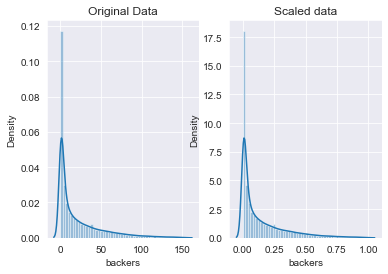

In [128]:
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df_2018['backers'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(X['backers'], ax=ax[1])
ax[1].set_title("Scaled data")

/Users/umasid/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/umasid/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Scaled data')

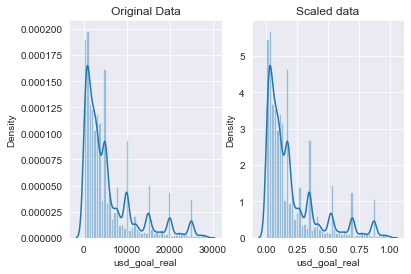

In [129]:
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df_2018['usd_goal_real'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(X['usd_goal_real'], ax=ax[1])
ax[1].set_title("Scaled data")

/Users/umasid/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/umasid/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Scaled data')

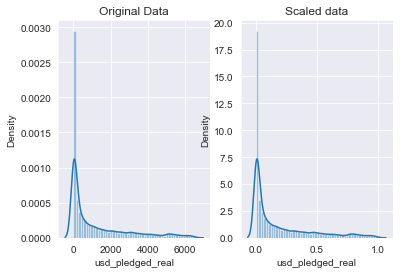

In [130]:
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df_2018['usd_pledged_real'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(X['usd_pledged_real'], ax=ax[1])
ax[1].set_title("Scaled data")

## Splitting the dataset in to train and test

We will now split the dataset in to train and testing using sklearn.modelselection.train_test_split()

In [131]:
# Splitting the dataset into the training set and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


## Classification using KNN

In [132]:
# Fitting classifier to the Training set 
pipe = Pipeline([('knn', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2))], verbose=3)
pipe.fit(X_train, y_train)

[Pipeline] ............... (step 1 of 1) Processing knn, total=   0.0s


Pipeline(steps=[('knn', KNeighborsClassifier())], verbose=3)

In [133]:
# Predicting the Test set
y_pred = pipe.predict(X_test)

In [134]:
# Making the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[25804,  1079],
       [ 1044, 11279]])

In [135]:
# Calculating the accuracy score
acc = accuracy_score(y_test, y_pred)
acc

0.9458501249808703

## Classification with SVM

In [136]:
# Fitting SVM to the training set
#classifier_svc = SVC(kernel='linear', random_state=0)
#classifier_svc.fit(X_train, y_train)

In [137]:
# Fitting SVM to the training set
pipe = Pipeline([('SVM', SVC(kernel='linear', random_state=0))], verbose=3)
pipe.fit(X_train, y_train)

[Pipeline] ............... (step 1 of 1) Processing SVM, total= 5.9min


Pipeline(steps=[('SVM', SVC(kernel='linear', random_state=0))], verbose=3)

In [138]:
# Predicting the Test set results
y_pred = pipe.predict(X_test)

In [139]:
# Making the confusion Matrix
cm_svc = confusion_matrix(y_test, y_pred)
cm_svc

array([[26697,   186],
       [  266, 12057]])

In [140]:
# Calculating the accuracy score
acc = accuracy_score(y_test, y_pred)
acc

0.9884711523746366